In [172]:
import platform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
from matplotlib import font_manager, rc

sns.set_style(style='white')
plt.rcParams['axes.unicode_minus'] = False
# Show all columns
pd.options.display.max_columns = 50

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')

print(os.getcwd())

%matplotlib inline

C:\Users\unerue\Dropbox\Papers\ConstructionSafety\KCI-04-Apartment


In [227]:
df = pd.read_pickle('../input/DataEnglish.pkl')
print(df.shape)

columns = [
    '재해발생일', '연령', '재해유형', '규모', '공정률', '공사금액', '고용형태', '재해발생장소1',
    '근무기간', '개인보호장비착용', '사고종류', '공사종류2', '직업2', '질병명3', '질병부위3',  
    '작업공정_원인3', '작업내용_원인4', '기인물3', '발생형태3', '가해물1',  
    '불안전상태1', '불안전행동1', '추락높이', '추락장소1'
]

df = df[columns]
print(df.shape)

df = df[df['재해발생장소1'] == 'Apartment']
df.reset_index(drop=True, inplace=True)
print(df.shape)

(13491, 36)
(13491, 24)
(938, 24)


In [228]:
columns = [
    '재해발생일', '재해유형', '규모', 
    '공사금액', '고용형태', '재해발생장소1', '근무기간',
    '개인보호장비착용', '직업2', '질병명3', '질병부위3', 
    '작업공정_원인3', '작업내용_원인4', 
    '기인물3', '발생형태3', '가해물1', '불안전상태1', 
    '불안전행동1', '추락높이', '추락장소1']

print(len(columns))
df = df[columns]

20


In [229]:
df['개인보호장비착용'].fillna('Not wearing', inplace=True)
df['개인보호장비착용'].value_counts()

Not wearing                            534
Safety harness                         213
Safety helmet                          114
Safety shoes                            48
Safety gloves                           12
Supplied air respirator                  7
Other personal protective equipment      6
Safety goggles                           3
Safety face shield                       1
Name: 개인보호장비착용, dtype: int64

In [230]:
accident_types = df['발생형태3'].value_counts()[df['발생형태3'].value_counts() < 10].index.tolist()
df['발생형태3'].replace(accident_types, 'Others', inplace=True)
df['발생형태3'].value_counts(normalize=True)

Fall from height          0.438166
Rollover                  0.163113
Falling objects           0.133262
Collision by objects      0.121535
Jammed between objects    0.063966
Others                    0.038380
Collapse                  0.021322
Electrical                0.020256
Name: 발생형태3, dtype: float64

In [231]:
df['발생형태3'].replace(
    {'Collision by objects': 'Collision', 
     'Jammed between objects': 'Stucked'}, inplace=True)

In [178]:
# categories = ['추락', '전도·전복', '낙하·비래', '충돌·접촉', '협착·감김', '붕괴·도괴', '전류접촉', '기타']
categories = ['Fall from height', 'Rollover', 'Falling objects', 'Collision', 'Stucked', 'Collapse', 'Electrical', 'Others']
pivoted = df.pivot_table(index='재해유형', columns='발생형태3', values='재해발생일', aggfunc='count', fill_value=0)
pivoted = pivoted[categories]

In [179]:
pivoted = pivoted.div(pivoted.sum(axis=1), axis=0)
temp = df['발생형태3'].value_counts(normalize=True)

In [180]:
temp = pd.DataFrame(temp).T
temp = temp.append(pivoted, sort=False)
temp

,Fall from height,Rollover,Falling objects,Collision,Stucked,Others,Collapse,Electrical
발생형태3,0.438166,0.163113,0.133262,0.121535,0.063966,0.038380,0.021322,0.020256
Fatal,0.658754,0.044510,0.103858,0.044510,0.029674,0.032641,0.041543,0.044510
Nonfatal,0.314476,0.229617,0.149750,0.164725,0.083195,0.041597,0.009983,0.006656


In [181]:
temp = temp.sort_values(axis=1, by='발생형태3', ascending=False)

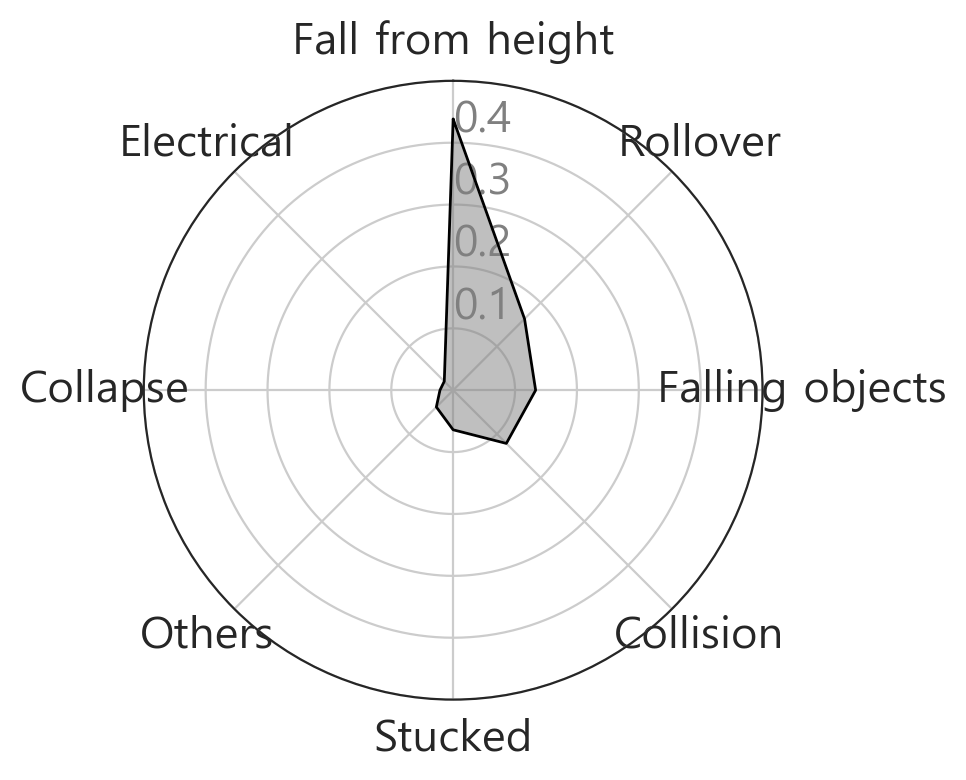

In [182]:
# categories = [
#     'Others', 'Falling objects', 'Collapse', 'Rollover', 
#     'Electric', 'Falls from height', 'Hit by objects', 'Stuck',   
# ]
# ------- PART 1: Create background
# number of variable
categories = list(temp[1:])
categories

categories = [
    'Fall from height', 'Rollover', 'Falling objects', 'Collision',
    'Stucked', 'Others', 'Collapse', 'Electrical',  
]

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure(dpi=200)
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5], ['0.1', '0.2', '0.3', '0.4'], color='grey', size=12)
plt.ylim(0, 0.5)

# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values = temp.iloc[0].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color='black')
ax.fill(angles, values, 'grey', alpha=0.5)
ax.tick_params(direction='out', which='major', labelsize=16)
# # Ind2
# values = temp.iloc[1].values.tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', color='black')
# ax.fill(angles, values, 'grey', alpha=0.2)

# # Ind2
# values = temp.iloc[2].values.tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="group C")
# ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
# plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.tight_layout()
plt.show()
fig.savefig('radar_chart.png')

In [183]:
from scipy.stats import chi2_contingency

def pivot_table(index=None, lambda_=None, subset=False, ratio=0):
    temp = df.pivot_table(index=index, columns=['재해유형'], values='재해발생일', fill_value=0, aggfunc='count')
    chi2, p, dof, ex = chi2_contingency(temp.values, lambda_=lambda_)
    print('Test of independence')
    print('Null hypothesis: Assumes that there is no association between the two variables.')
    print('Alternative hypothesis: Assumes that there is an association between the two variables.\n')
    print('Chi-squared statistic: {} \np-value: {:.3f} \nDegrees of freedom: {}\n'.format(chi2, float(str(p)), dof))
    temp['Fatal(%)'] = np.round(temp['Fatal'] / temp['Fatal'].sum(), 3) * 100
    temp['Nonfatal(%)'] = np.round(temp['Nonfatal'] / temp['Nonfatal'].sum(), 3) * 100
    temp['Total'] = temp['Fatal'] + temp['Nonfatal']
    temp['Ratio(%)'] = np.round(temp['Total'] / temp['Total'].sum(),3) * 100
    temp.sort_values(by='Total', ascending=False, inplace=True)
    if subset:
        return temp[temp['Ratio(%)'] > ratio]
    return temp

In [184]:
def draw_plot(df, center=.08, height=.5, savefig=False, text_size=11, legend_size=14, 
              file_name=None, figsize=(10,6), label=False):
    fig, ax = plt.subplots(dpi=200, figsize=figsize)
    df.plot(
        kind='bar', width=0.9, edgecolor='black', linewidth=0.5, color=['gray', 'white'], ax=ax) # colormap='Pastel1'

    for i in ax.patches:
        ax.text(i.get_x()+center, i.get_height()+height, str(np.round(i.get_height(), 1)), fontsize=text_size)

    ax.legend(['Fatal', 'Nonfatal'], frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
              framealpha=1, edgecolor='black', borderpad=1, prop={'size': legend_size})
    leg = plt.gca().get_legend()
    ltext  = leg.get_texts()  # all the text.Text instance in the legend
    llines = leg.get_lines()  # all the lines.Line2D instance in the legend
    frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
    frame.set_facecolor('0.80')      
    # plt.setp(ltext, fontsize='small')  
    plt.setp(llines, linewidth=0.5)
    ax.grid(linestyle='--', axis='y')
    ax.set_xlabel('Factor names', fontsize=20)
    ax.set_ylabel('Number of occupational injury (%)', fontsize=20)
    ax.set_yticklabels(['', '5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%', '45%', '50%', '55%', '60%'])
    ax.tick_params(axis='y', which='major', labelsize=16)
    ax.tick_params(axis='x', which='major', labelsize=20)
    if label:
        ax.set_xticklabels(label)
    plt.xticks(rotation=45)
    fig.tight_layout()
    plt.show()
    if savefig:
        fig.savefig('{}.png'.format(file_name))

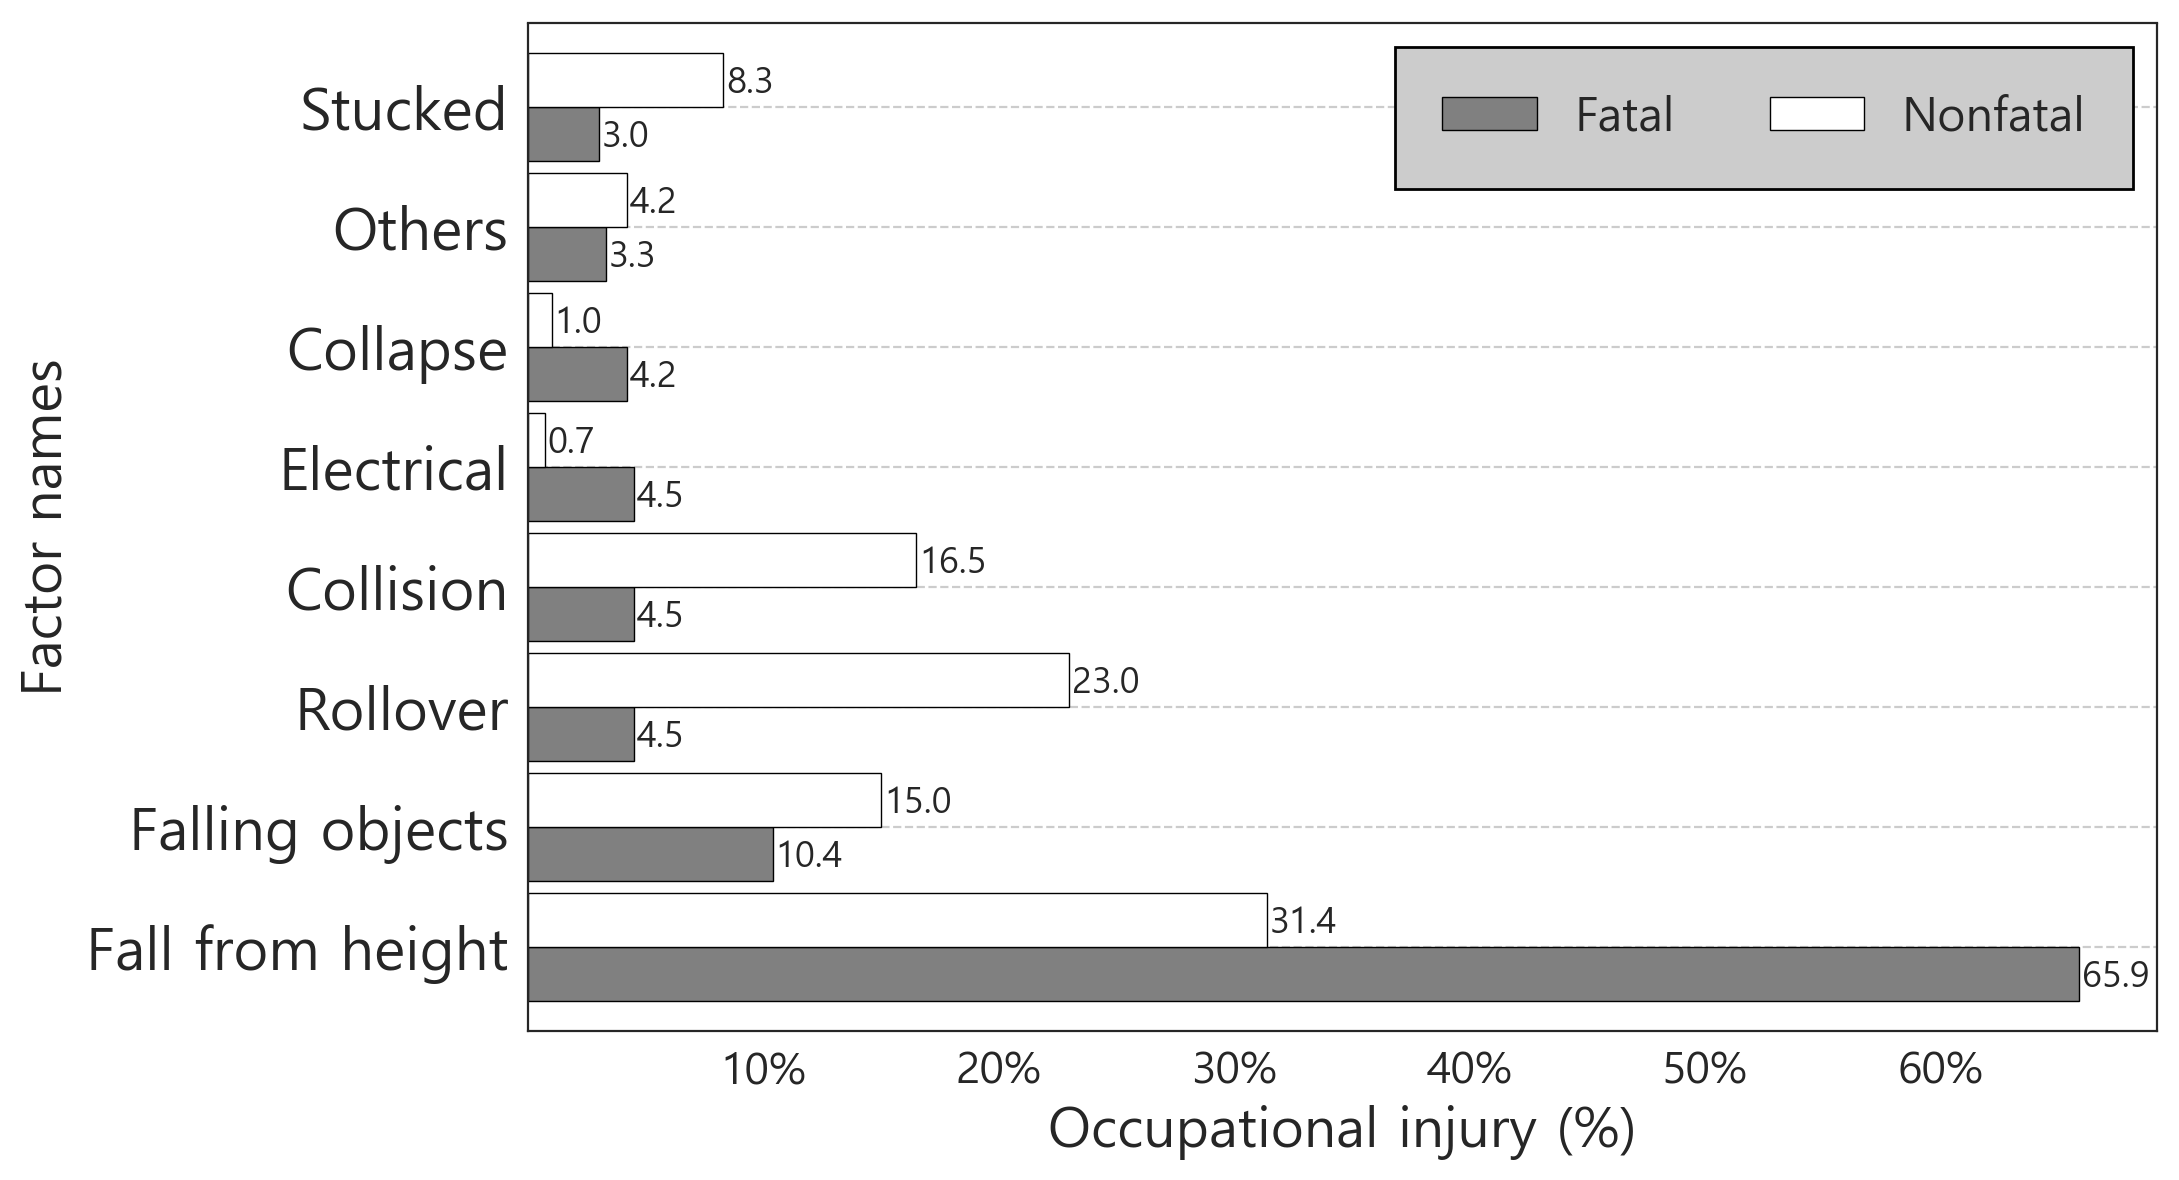

In [201]:
temp = df.pivot_table(index='발생형태3', columns='재해유형', values='재해발생일', aggfunc='count', fill_value=0)
temp.sort_values(by='Fatal', ascending=False, inplace=True)
temp = np.round(temp.div(temp.sum()) * 100, 1)
temp.sort_values(by=['Fatal', 'Nonfatal'], ascending=False)

labels = [
    'Fall from height', 'Falling objects', 'Rollover',  
    'Collision', 'Electrical',  'Collapse', 'Others', 'Stucked', 
]

fig, ax = plt.subplots(dpi=200, figsize=(11,6))
temp.sort_values(by=['Fatal', 'Nonfatal'], ascending=False).plot(
    kind='barh', width=0.9, edgecolor='black', 
    linewidth=0.5, color=['gray', 'white'], ax=ax) # colormap='Pastel1'

for i in ax.patches:
    ax.text(i.get_width()+0.12, i.get_y()+0.12, str(np.round(i.get_width(), 1)), fontsize=13)

ax.legend(frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
          framealpha=1, edgecolor='black', borderpad=1, prop={'size': 17})
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
llines = leg.get_lines()  # all the lines.Line2D instance in the legend
frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')      
# plt.setp(ltext, fontsize='small')  
plt.setp(llines, linewidth=0.5)
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('Occupational injury (%)', fontsize=20)
ax.set_xticklabels(['', '10%', '20%', '30%', '40%', '50%', '60%'])
ax.set_ylabel('Factor names', fontsize=20)
ax.tick_params(axis='y', which='major', labelsize=21)
ax.tick_params(axis='x', which='major', labelsize=16)
# plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
fig.savefig('Korean-발생형태.png')

In [186]:
df['고용형태'].value_counts(normalize=True)

Daily        0.784188
Full-time    0.141026
Temporary    0.072650
Part-time    0.002137
Name: 고용형태, dtype: float64

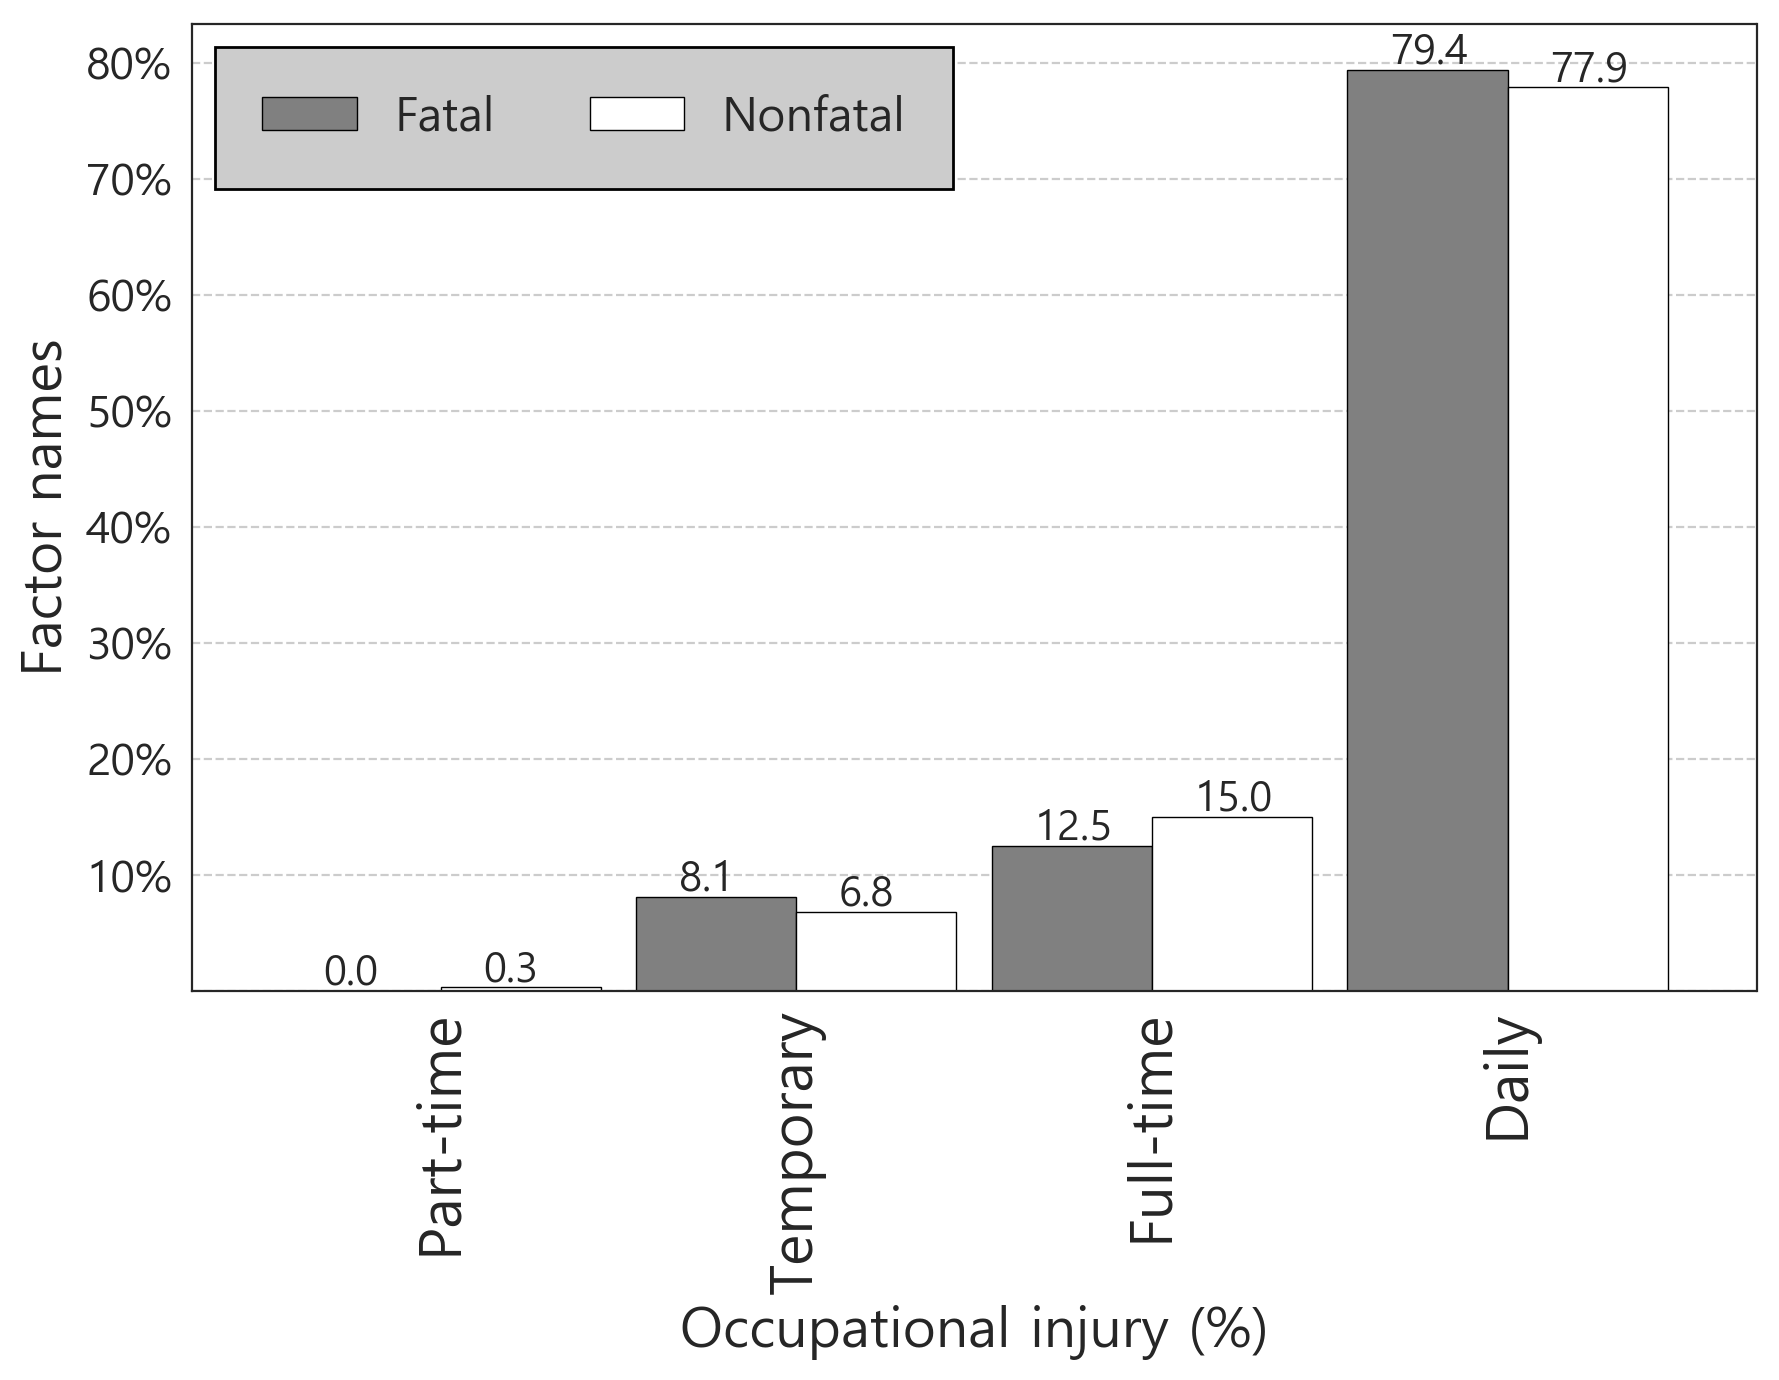

In [216]:
temp = df.pivot_table(index='고용형태', columns='재해유형', values='재해발생일', aggfunc='count', fill_value=0)
temp.sort_values(by='Fatal', ascending=False, inplace=True)
temp = np.round(temp.div(temp.sum()) * 100, 1)

fig, ax = plt.subplots(dpi=200, figsize=(9,7))
temp.loc[:, ['Fatal', 'Nonfatal']].sort_values(by=['Fatal', 'Nonfatal'], ascending=True).plot(
    kind='bar', width=0.9, edgecolor='black', 
    linewidth=0.5, color=['gray', 'white'], ax=ax) # colormap='Pastel1'

for i in ax.patches:
        ax.text(i.get_x()+0.12, i.get_height()+0.5, str(np.round(i.get_height(), 1)), fontsize=15)

ax.legend(['Fatal', 'Nonfatal'], frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
          framealpha=1, edgecolor='black', borderpad=1, prop={'size': 17})
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
llines = leg.get_lines()  # all the lines.Line2D instance in the legend
frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')      
# plt.setp(ltext, fontsize='small')  
plt.setp(llines, linewidth=0.5)
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('Occupational injury (%)', fontsize=20)
ax.set_yticklabels(['', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%'])
ax.set_ylabel('Factor names', fontsize=20)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='x', which='major', labelsize=21)
# plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
fig.savefig('Korean-근무형태.png')

In [211]:
temp = pivot_table('근무기간')
temp = temp.sort_values(by=['Fatal(%)', 'Nonfatal(%)'], ascending=False)[:8]
temp = temp.sort_values(by=['Fatal(%)', 'Nonfatal(%)'], ascending=True)

Test of independence
Null hypothesis: Assumes that there is no association between the two variables.
Alternative hypothesis: Assumes that there is an association between the two variables.

Chi-squared statistic: 64.60333543557176 
p-value: 0.000 
Degrees of freedom: 13



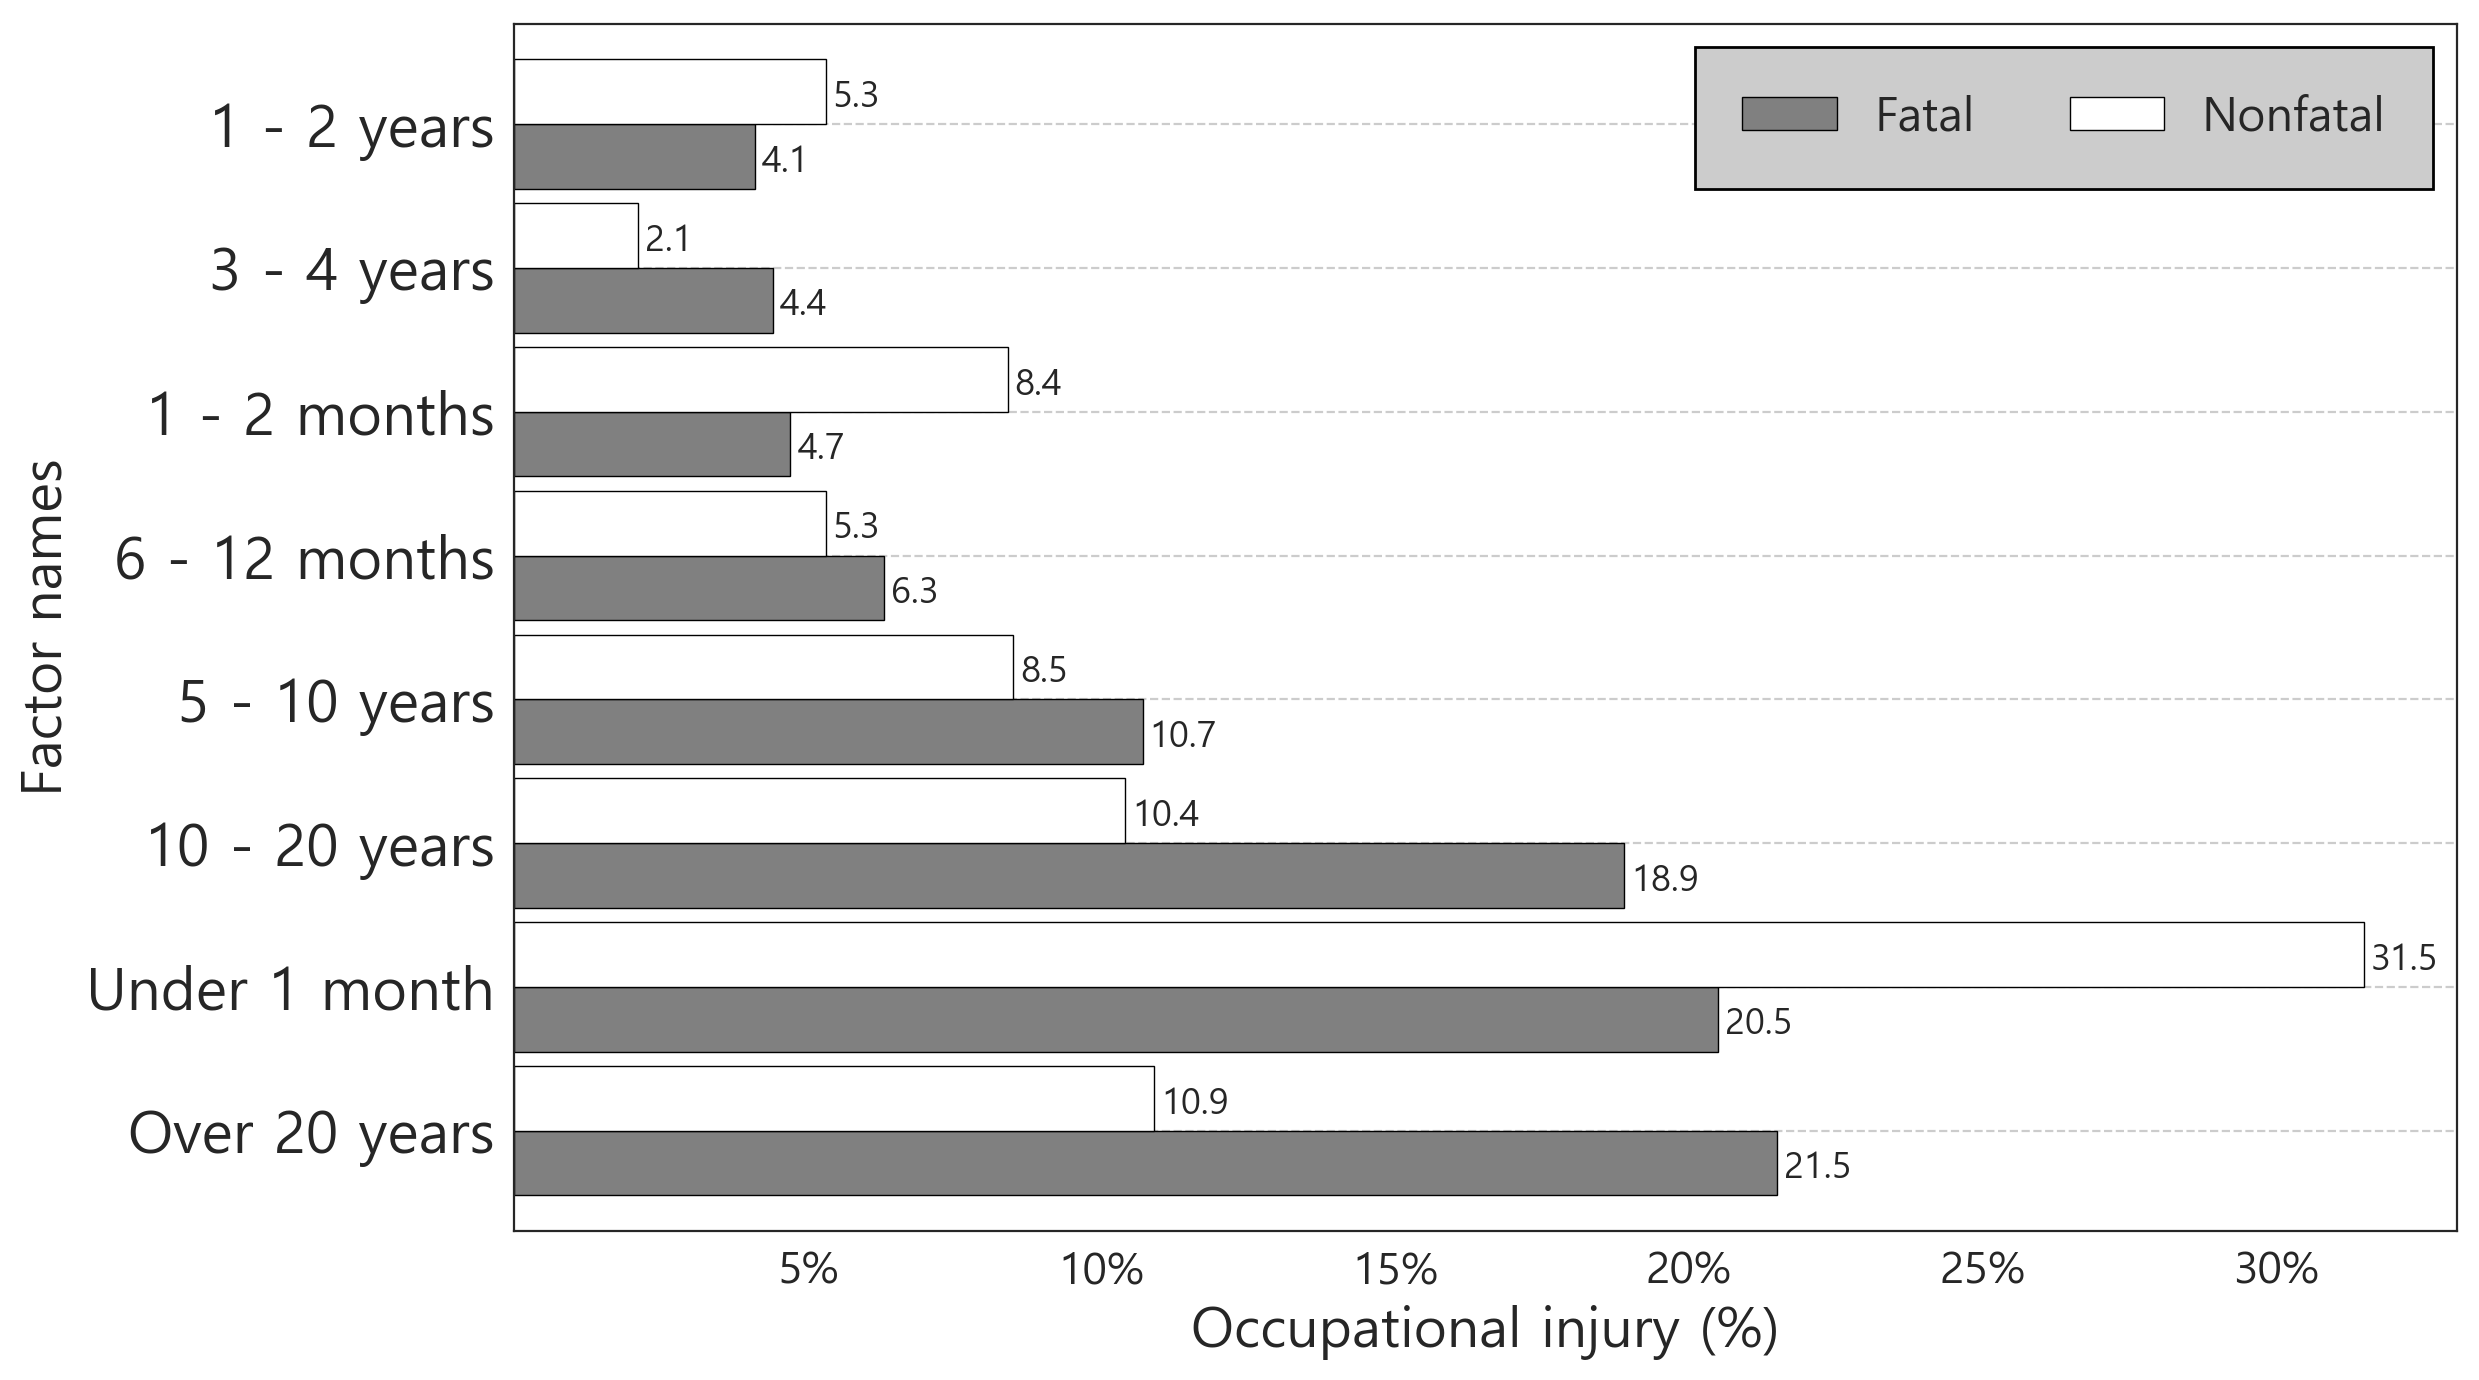

In [212]:
fig, ax = plt.subplots(dpi=200, figsize=(12.5,7))
temp.loc[:, ['Fatal(%)', 'Nonfatal(%)']].sort_values(by=['Fatal(%)', 'Nonfatal(%)'], ascending=False).plot(
    kind='barh', width=0.9, edgecolor='black', 
    linewidth=0.5, color=['gray', 'white'], ax=ax) # colormap='Pastel1'

for i in ax.patches:
    ax.text(i.get_width()+0.12, i.get_y()+0.12, str(np.round(i.get_width(), 1)), fontsize=13)

ax.legend(['Fatal', 'Nonfatal'], frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
          framealpha=1, edgecolor='black', borderpad=1, prop={'size': 17})
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
llines = leg.get_lines()  # all the lines.Line2D instance in the legend
frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')      
# plt.setp(ltext, fontsize='small')  
plt.setp(llines, linewidth=0.5)
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('Occupational injury (%)', fontsize=20)
ax.set_xticklabels(['', '5%', '10%', '15%', '20%', '25%', '30%'])
ax.set_ylabel('Factor names', fontsize=20)
ax.tick_params(axis='y', which='major', labelsize=21)
ax.tick_params(axis='x', which='major', labelsize=16)
# plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
fig.savefig('Korean-근무기간.png')

In [213]:
# draw_plot(temp.loc[:, ['Fatal(%)', 'Nonfatal(%)']], center=.04, height=.1, text_size=12,
#           savefig=True, figsize=(9,6.5), file_name='Korean-근무기간')

Test of independence
Null hypothesis: Assumes that there is no association between the two variables.
Alternative hypothesis: Assumes that there is an association between the two variables.

Chi-squared statistic: 79.00763956218192 
p-value: 0.000 
Degrees of freedom: 17



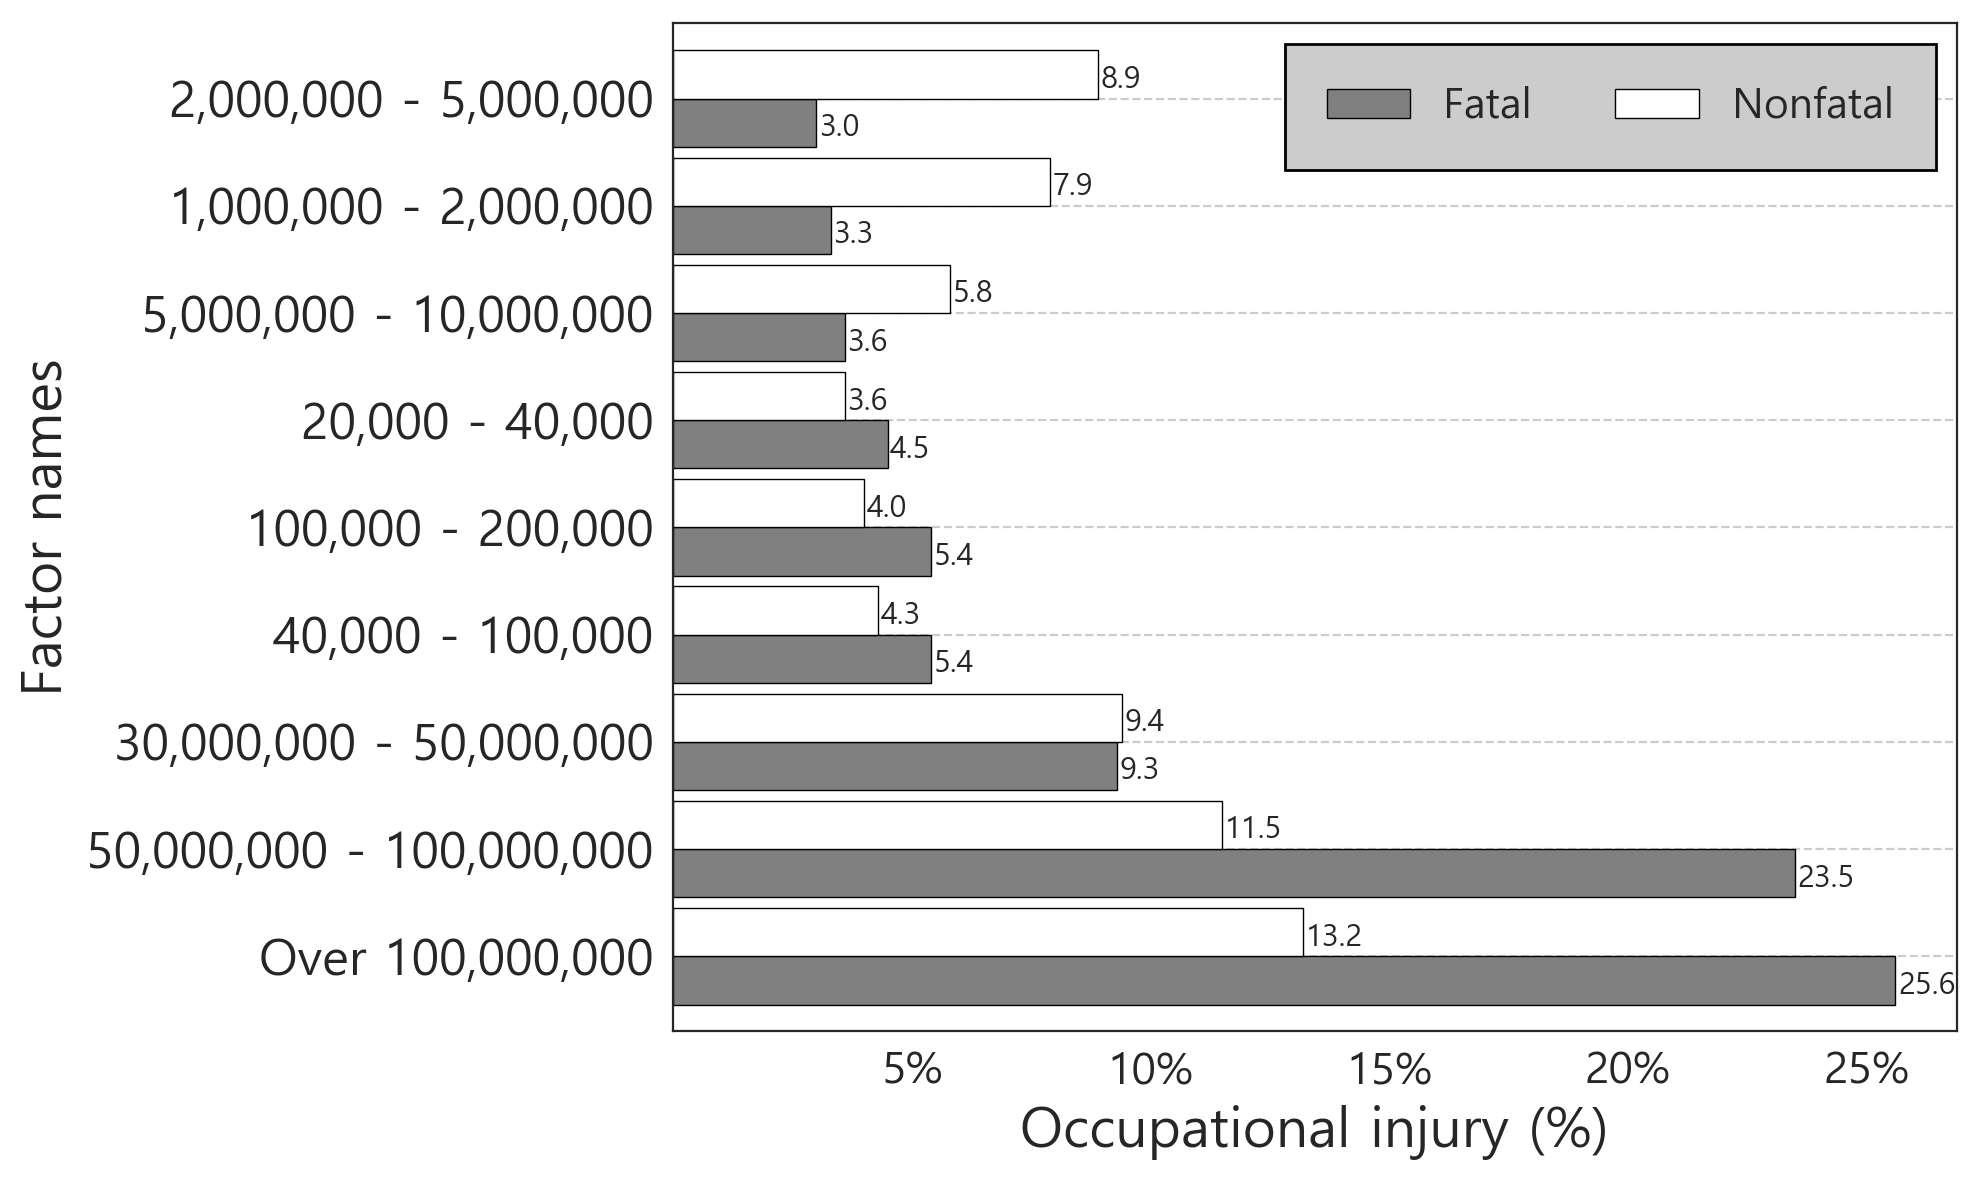

In [214]:
temp = pivot_table('공사금액', None, True, 3)
temp = temp.sort_values(by='Fatal', ascending=False)[:9]
temp

fig, ax = plt.subplots(dpi=200, figsize=(10,6))

temp.loc[:,['Fatal(%)', 'Nonfatal(%)']].plot(
    kind='barh', width=0.9, edgecolor='black', linewidth=0.5, 
    color=['gray', 'white'], ax=ax) # colormap='Pastel1'

for i in ax.patches:
    ax.text(i.get_width()+0.05, i.get_y()+0.1, str(np.round(i.get_width(), 1)), fontsize=11)

ax.legend(['Fatal', 'Nonfatal'], frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
          framealpha=1, edgecolor='black', borderpad=1, prop={'size': 15})
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
llines = leg.get_lines()  # all the lines.Line2D instance in the legend
frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')      
# plt.setp(ltext, fontsize='small')  
plt.setp(llines, linewidth=0.5)
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('Occupational injury (%)', fontsize=20)
ax.set_xticklabels(['', '5%', '10%', '15%', '20%', '25%', '30%'])
ax.set_ylabel('Factor names', fontsize=20)
ax.tick_params(axis='y', which='major', labelsize=18)
ax.tick_params(axis='x', which='major', labelsize=16)
# plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
fig.savefig('Korean-공사금액.png')

Test of independence
Null hypothesis: Assumes that there is no association between the two variables.
Alternative hypothesis: Assumes that there is an association between the two variables.

Chi-squared statistic: 348.38032344046724 
p-value: 0.000 
Degrees of freedom: 64



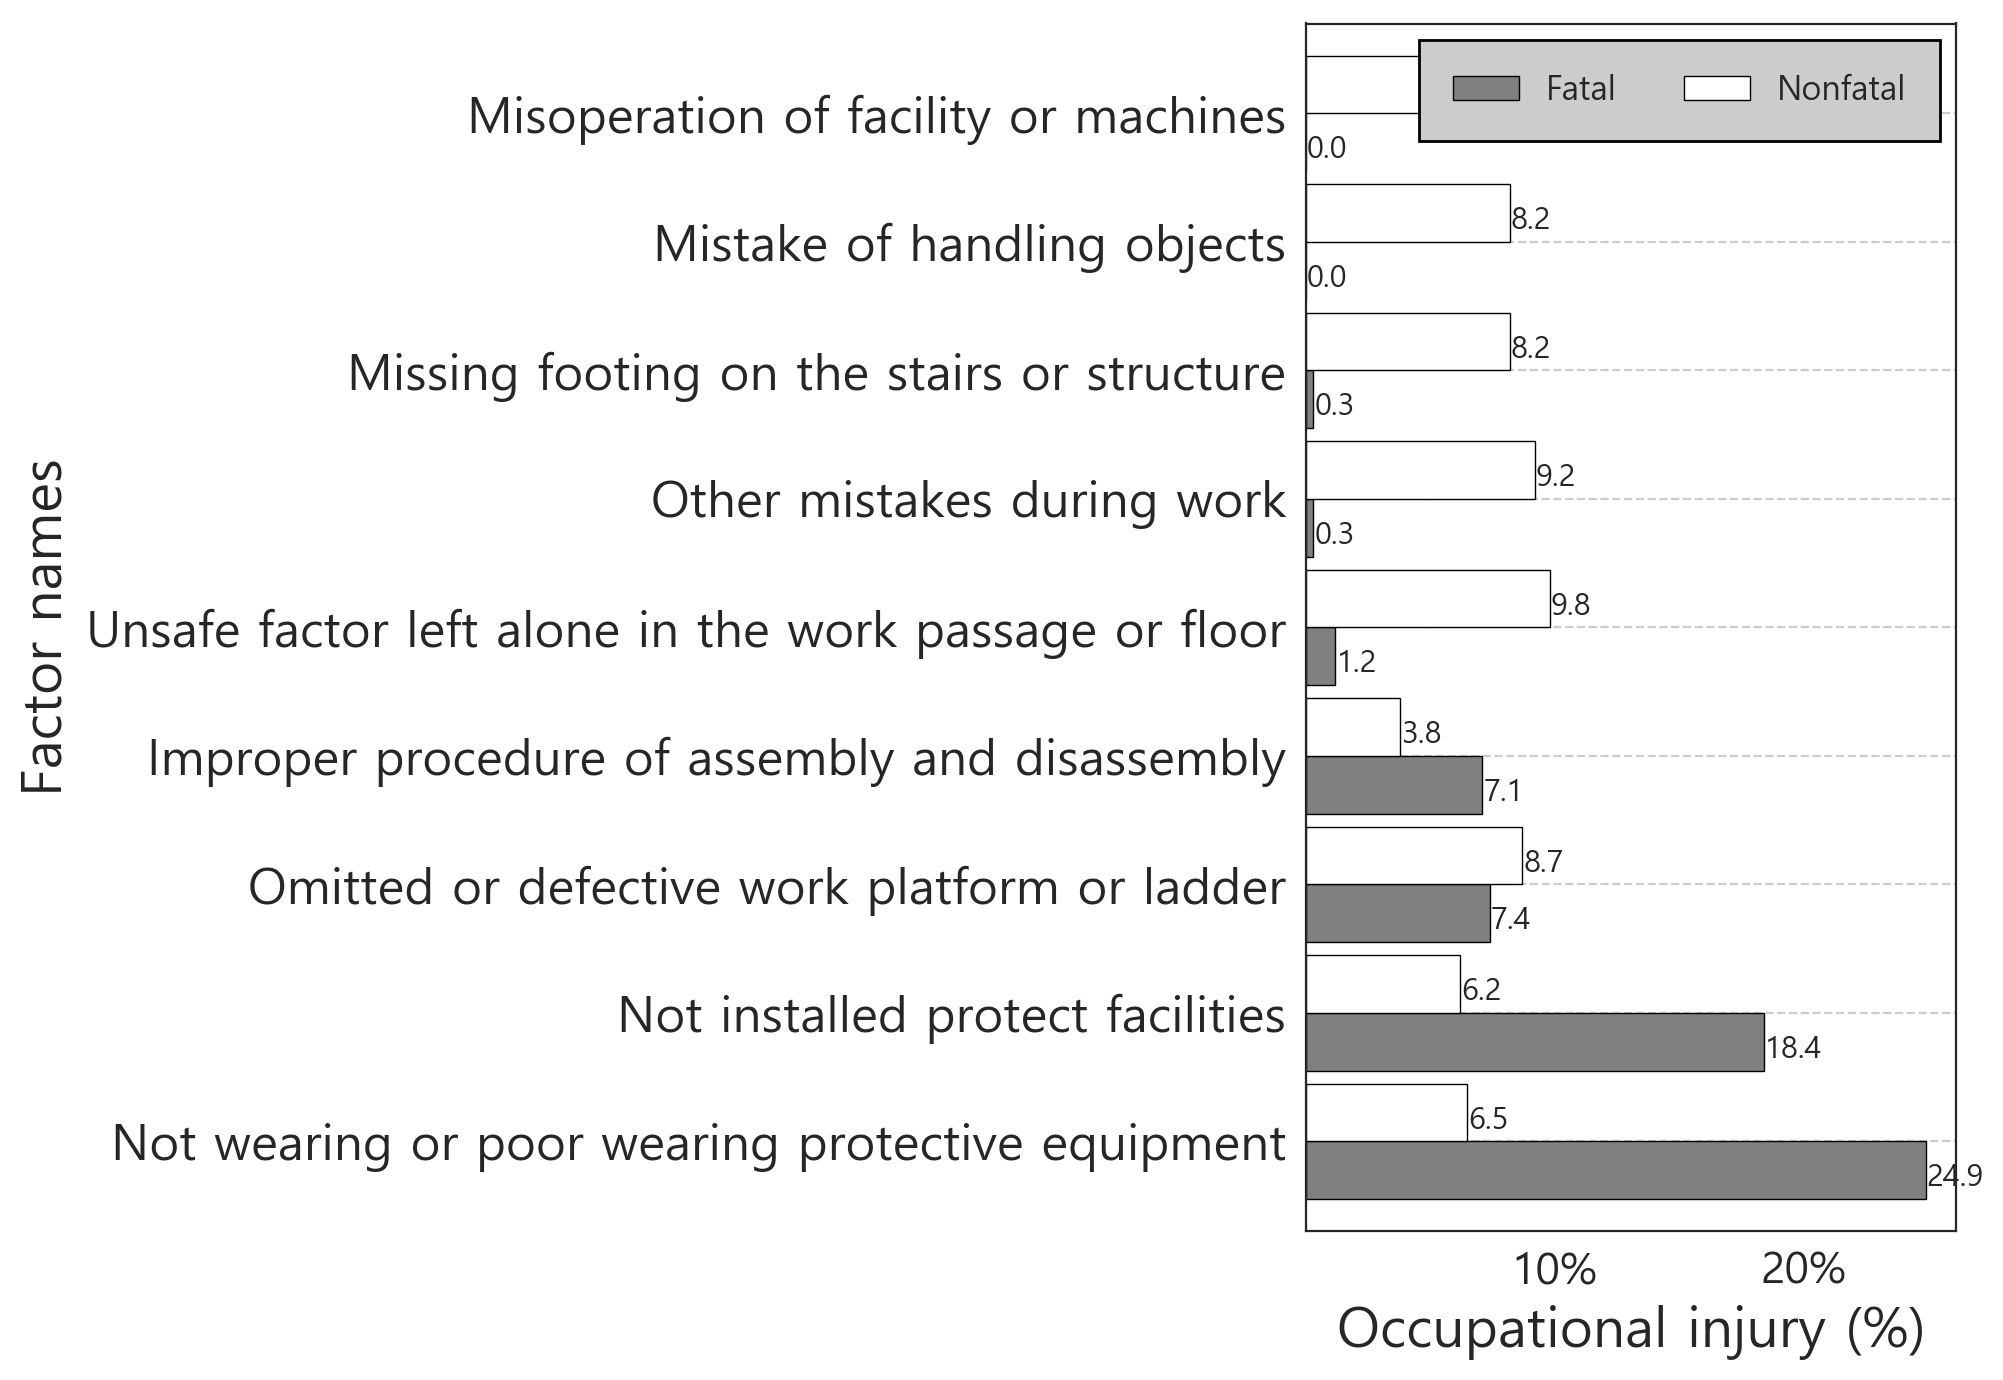

In [152]:
temp = pivot_table('불안전행동1', None, True, 3)
temp = temp.sort_values(by='Fatal', ascending=False)[:9]
temp

fig, ax = plt.subplots(dpi=200, figsize=(10,7))

temp.loc[:,['Fatal(%)', 'Nonfatal(%)']].plot(
    kind='barh', width=0.9, edgecolor='black', linewidth=0.5, 
    color=['gray', 'white'], ax=ax) # colormap='Pastel1'

for i in ax.patches:
    ax.text(i.get_width()+0.05, i.get_y()+0.1, str(np.round(i.get_width(), 1)), fontsize=11)

ax.legend(['Fatal', 'Nonfatal'], frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
          framealpha=1, edgecolor='black', borderpad=1, prop={'size': 12})
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
llines = leg.get_lines()  # all the lines.Line2D instance in the legend
frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')      
# plt.setp(ltext, fontsize='small')  
plt.setp(llines, linewidth=0.5)
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('Occupational injury (%)', fontsize=20)
ax.set_xticklabels(['', '10%', '20%', '30%', '40%', '50%', '60%'])
ax.set_ylabel('Factor names', fontsize=20)
ax.tick_params(axis='y', which='major', labelsize=18)
ax.tick_params(axis='x', which='major', labelsize=16)
# plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
fig.savefig('Korean-불안전행동.png')

In [153]:
# temp = pivot_table('불안전행동1', None, True, 3)

# fig, ax = plt.subplots(dpi=200, figsize=(10,6))
# temp.sort_values(by='Fatal').loc[:,['Fatal(%)', 'Nonfatal(%)']].plot(
#     kind='barh', width=0.9, edgecolor='black', linewidth=0.5, 
#     color=['gray', 'white'], ax=ax) # colormap='Pastel1'

# for i in ax.patches:
#     ax.text(i.get_width()+0.05, i.get_y()+0.1, str(np.round(i.get_width(), 1)), fontsize=11)

# ax.legend(frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
#           framealpha=1, edgecolor='black', borderpad=1)
# leg = plt.gca().get_legend()
# ltext  = leg.get_texts()  # all the text.Text instance in the legend
# llines = leg.get_lines()  # all the lines.Line2D instance in the legend
# frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
# frame.set_facecolor('0.80')      
# # plt.setp(ltext, fontsize='small')  
# plt.setp(llines, linewidth=0.5)
# ax.grid(linestyle='--', axis='y')
# ax.set_xlim([0,27])
# ax.set_xlabel('Number of occupational injury (%)', fontsize=13)
# ax.set_xticklabels(['', '10%', '20%', '30%', '40%', '50%', '60%'])
# ax.set_ylabel('Factor names', fontsize=13)
# fig.tight_layout()
# plt.show()
# fig.savefig('Korean-불안전행동.png')

Test of independence
Null hypothesis: Assumes that there is no association between the two variables.
Alternative hypothesis: Assumes that there is an association between the two variables.

Chi-squared statistic: 417.5527771983297 
p-value: 0.000 
Degrees of freedom: 6



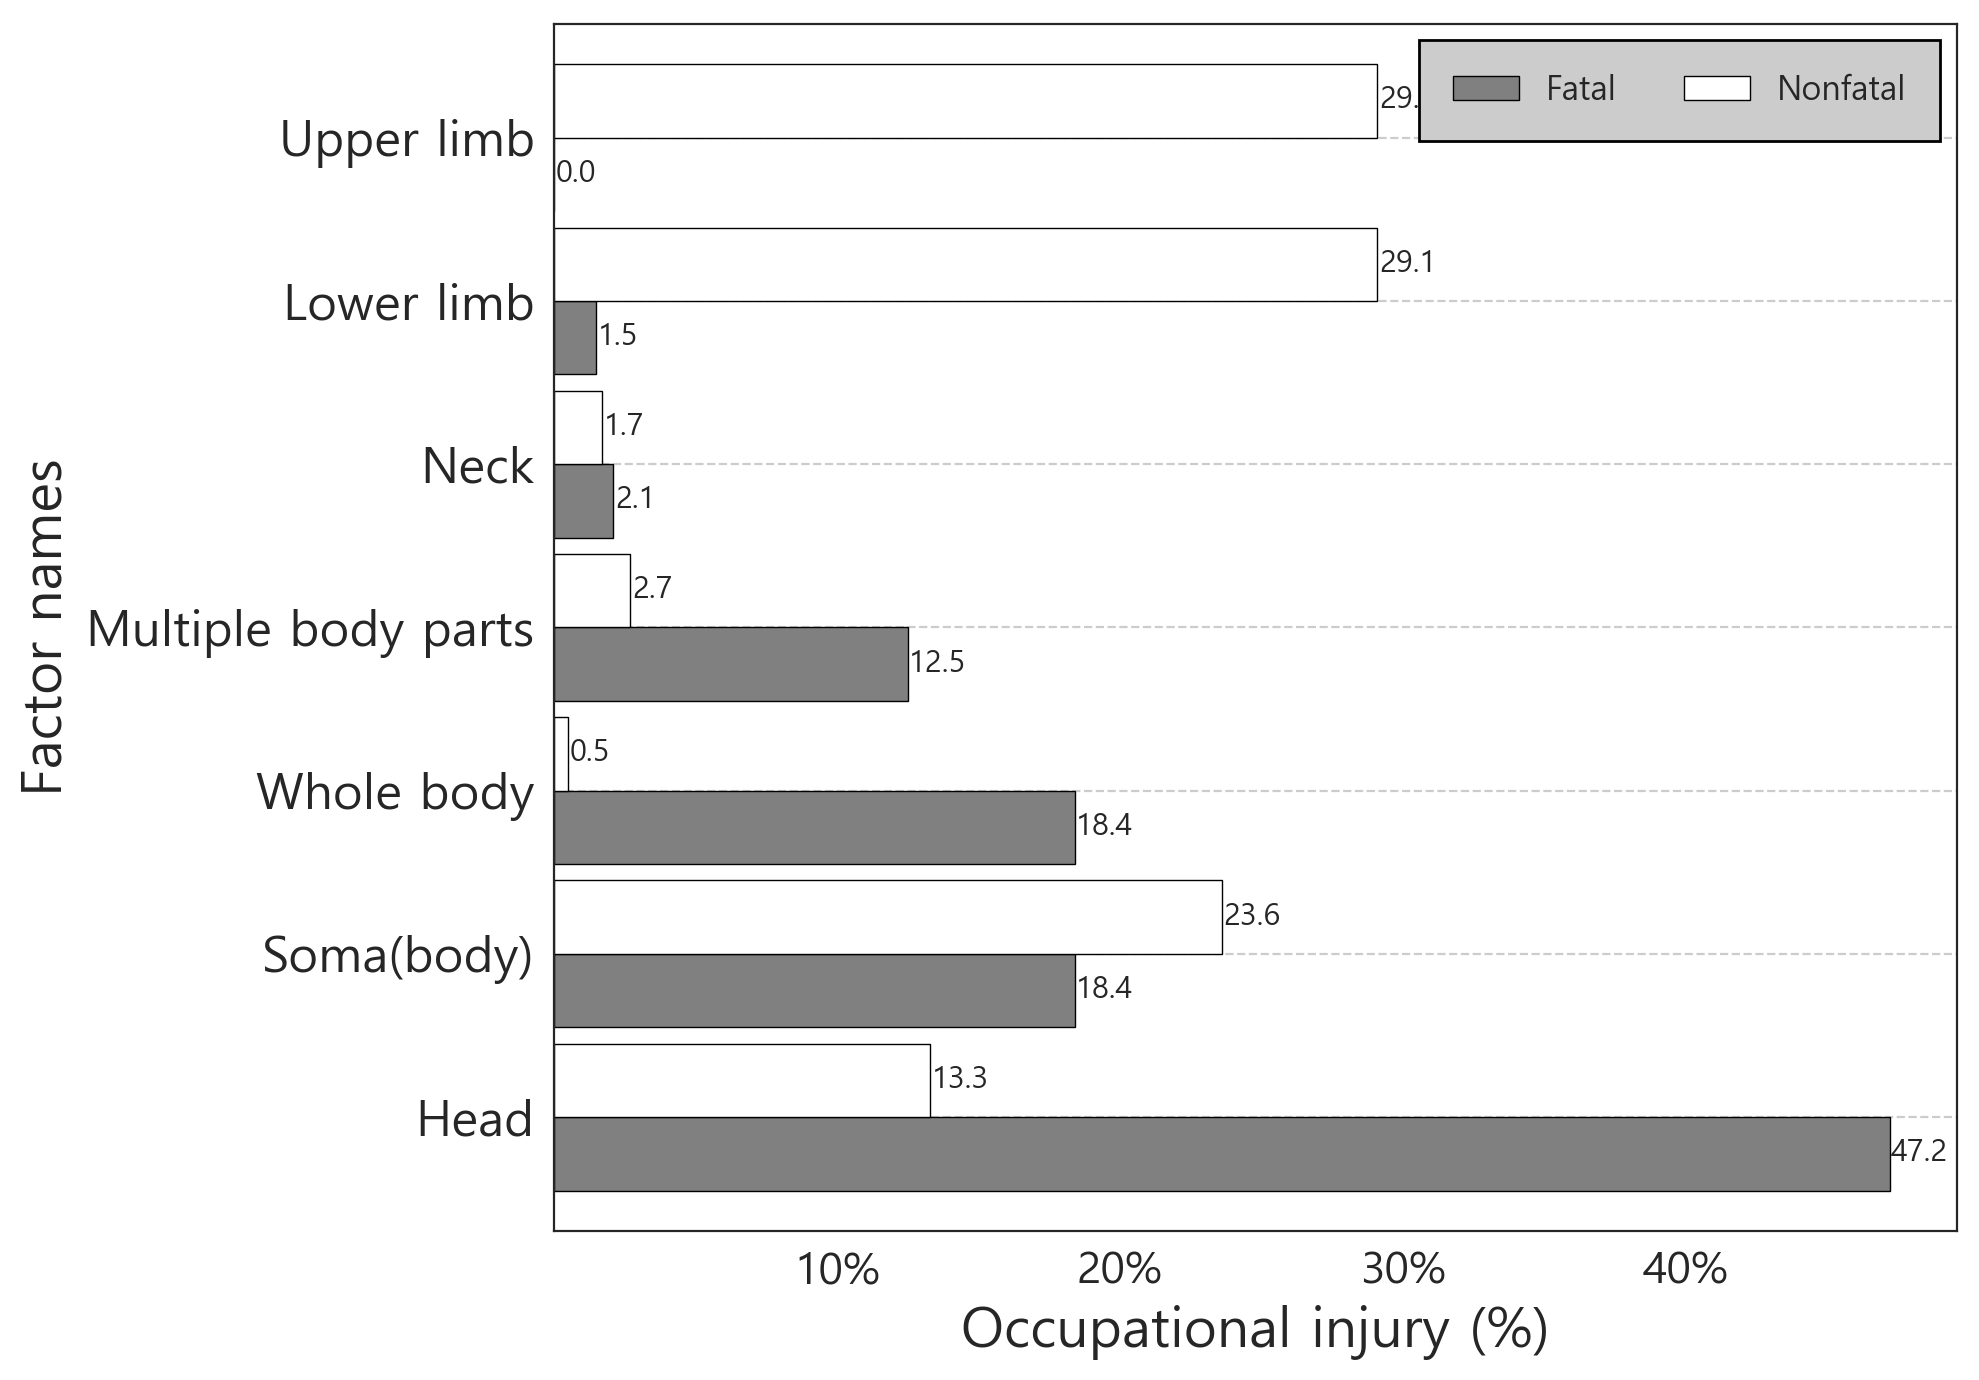

In [217]:
temp = pivot_table('질병부위3', None, True, 0)
temp = temp.sort_values(by='Fatal', ascending=False)[:9]
temp

fig, ax = plt.subplots(dpi=200, figsize=(10,7))

temp.loc[:,['Fatal(%)', 'Nonfatal(%)']].plot(
    kind='barh', width=0.9, edgecolor='black', linewidth=0.5, 
    color=['gray', 'white'], ax=ax) # colormap='Pastel1'

for i in ax.patches:
    ax.text(i.get_width()+0.05, i.get_y()+0.18, str(np.round(i.get_width(), 1)), fontsize=11)

ax.legend(['Fatal', 'Nonfatal'], frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
          framealpha=1, edgecolor='black', borderpad=1, prop={'size': 12})
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
llines = leg.get_lines()  # all the lines.Line2D instance in the legend
frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')      
# plt.setp(ltext, fontsize='small')  
plt.setp(llines, linewidth=0.5)
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('Occupational injury (%)', fontsize=20)
ax.set_xticklabels(['', '10%', '20%', '30%', '40%', '50%', '60%'])
ax.set_ylabel('Factor names', fontsize=20)
ax.tick_params(axis='y', which='major', labelsize=18)
ax.tick_params(axis='x', which='major', labelsize=16)
# plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
fig.savefig('Korean-질병부위.png')

In [155]:
# temp = pivot_table('질병부위3', None, True, 1)

# fig, ax = plt.subplots(dpi=200, figsize=(10,6))
# temp.sort_values(by='Fatal').loc[:, ['Fatal(%)', 'Nonfatal(%)']].plot(
#     kind='barh', width=0.9, edgecolor='black', 
#     linewidth=0.5, color=['gray', 'white'], ax=ax) # colormap='Pastel1'

# for i in ax.patches:
#     ax.text(i.get_width()+0.1, i.get_y()+0.15, str(np.round(i.get_width(), 1)), fontsize=11)

# ax.legend(['Fatal', 'Nonfatal'], frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
#           framealpha=1, edgecolor='black', borderpad=1)
# leg = plt.gca().get_legend()
# ltext  = leg.get_texts()  # all the text.Text instance in the legend
# llines = leg.get_lines()  # all the lines.Line2D instance in the legend
# frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
# frame.set_facecolor('0.80')      
# # plt.setp(ltext, fontsize='small')  
# plt.setp(llines, linewidth=0.5)
# ax.grid(linestyle='--', axis='y')
# ax.set_xlim([0,50])
# ax.set_xlabel('Number of occupational injury (%)', fontsize=13)
# ax.set_xticklabels(['', '10%', '20%', '30%', '40%', '50%', '60%'])
# ax.set_ylabel('Factor names', fontsize=13)
# # plt.xticks(rotation=45)
# fig.tight_layout()
# plt.show()
# fig.savefig('Korean-질병부위.png')

Test of independence
Null hypothesis: Assumes that there is no association between the two variables.
Alternative hypothesis: Assumes that there is an association between the two variables.

Chi-squared statistic: 621.0787416779966 
p-value: 0.000 
Degrees of freedom: 10



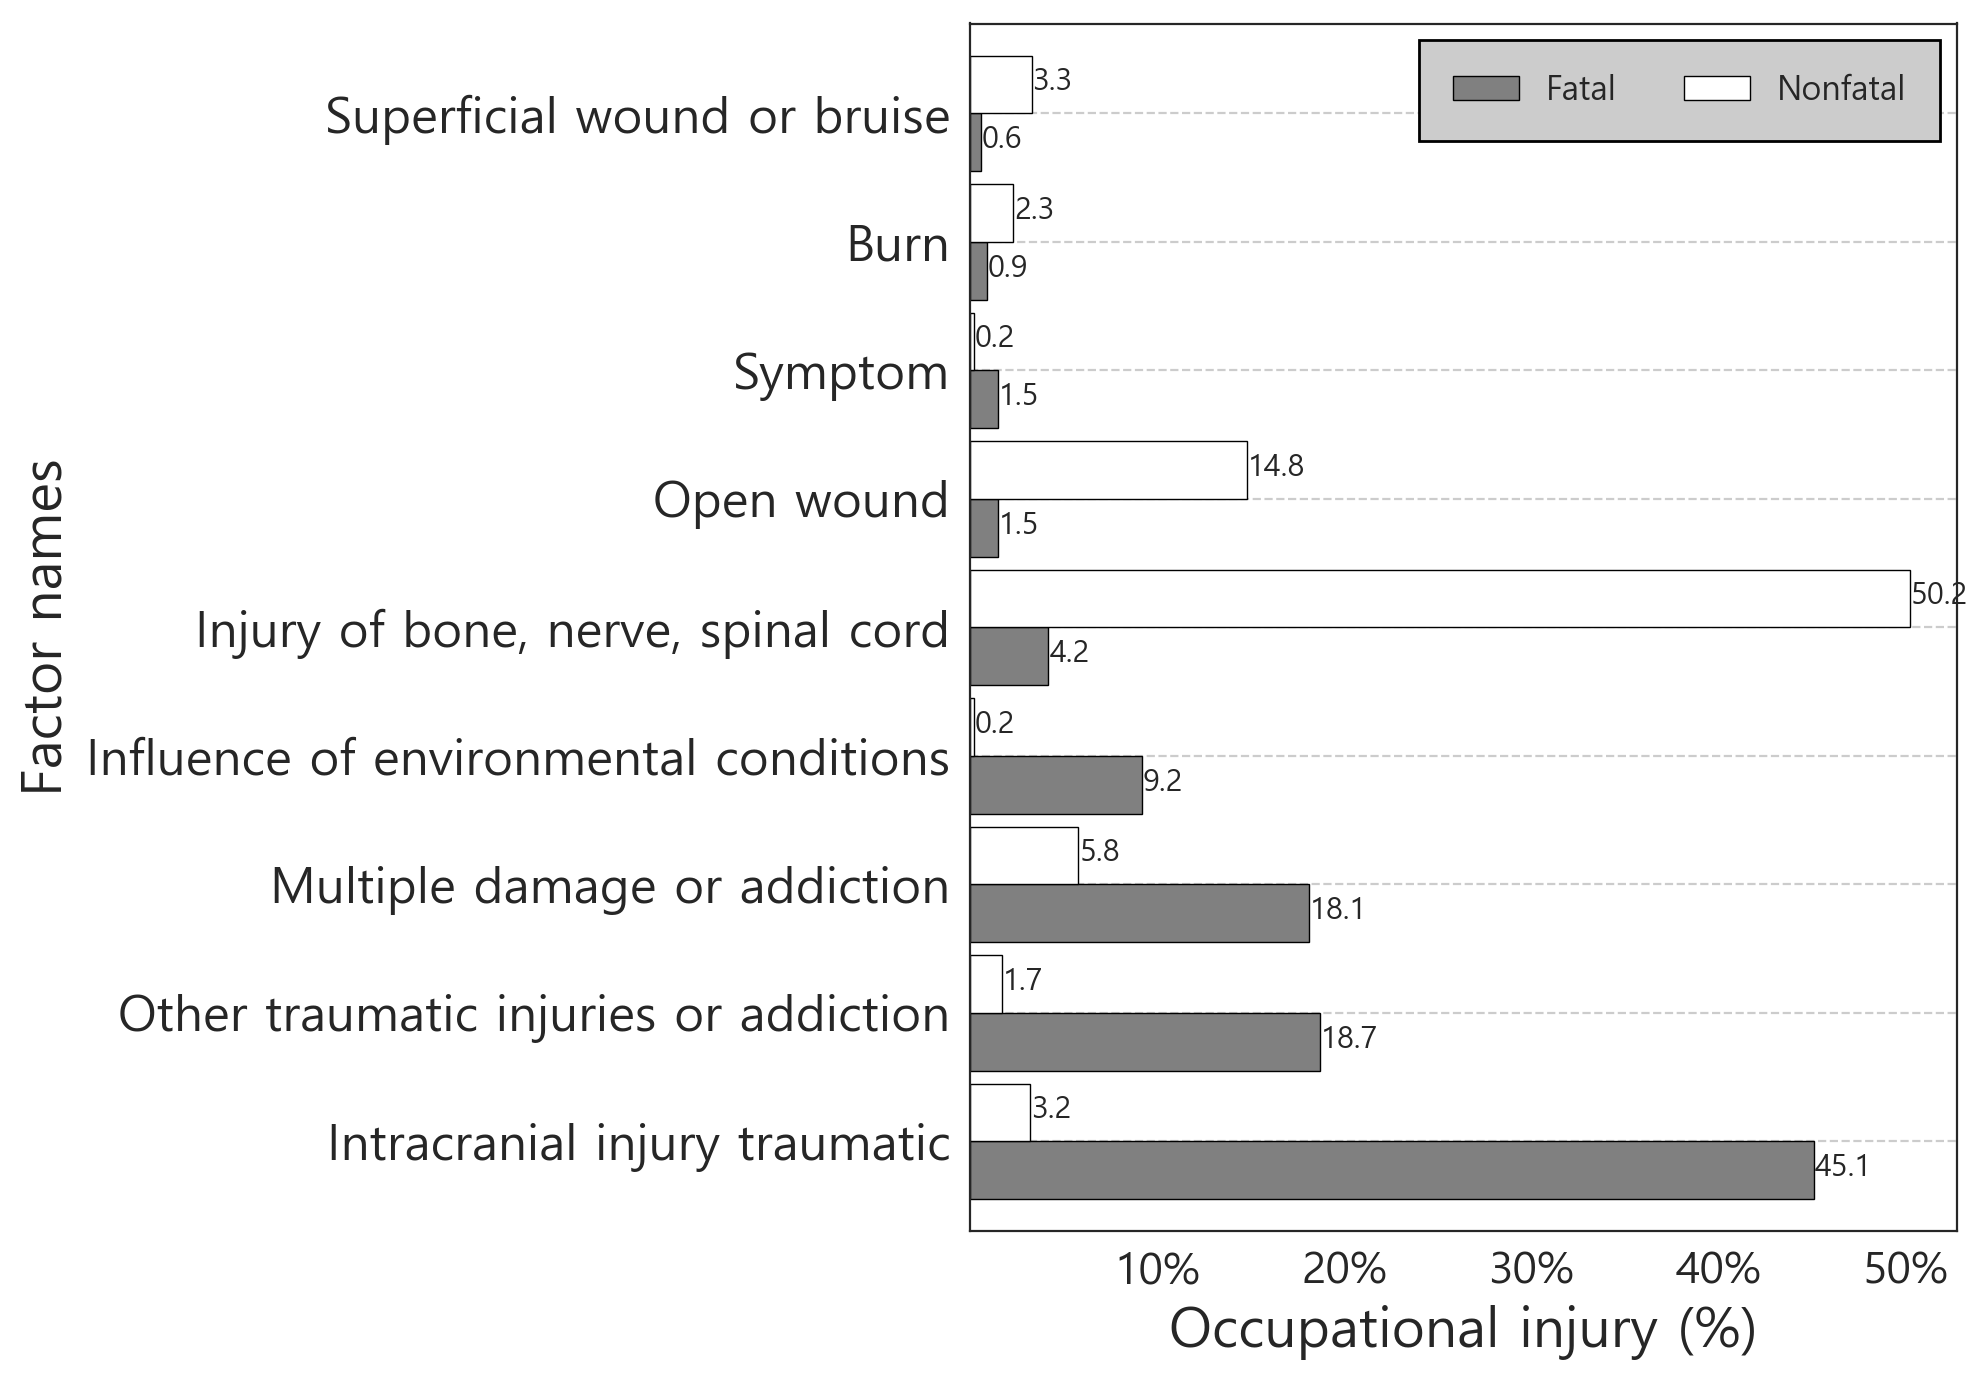

In [156]:
temp = pivot_table('질병명3', None, True, 0)
temp = temp.sort_values(by='Fatal', ascending=False)[:9]
temp

fig, ax = plt.subplots(dpi=200, figsize=(10,7))

temp.loc[:,['Fatal(%)', 'Nonfatal(%)']].plot(
    kind='barh', width=0.9, edgecolor='black', linewidth=0.5, 
    color=['gray', 'white'], ax=ax) # colormap='Pastel1'

for i in ax.patches:
    ax.text(i.get_width()+0.05, i.get_y()+0.18, str(np.round(i.get_width(), 1)), fontsize=11)

ax.legend(['Fatal', 'Nonfatal'], frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
          framealpha=1, edgecolor='black', borderpad=1, prop={'size': 12})
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
llines = leg.get_lines()  # all the lines.Line2D instance in the legend
frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')      
# plt.setp(ltext, fontsize='small')  
plt.setp(llines, linewidth=0.5)
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('Occupational injury (%)', fontsize=20)
ax.set_xticklabels(['', '10%', '20%', '30%', '40%', '50%', '60%'])
ax.set_ylabel('Factor names', fontsize=20)
ax.tick_params(axis='y', which='major', labelsize=18)
ax.tick_params(axis='x', which='major', labelsize=16)
# plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
fig.savefig('Korean-질병명.png')

In [157]:
# temp = pivot_table('질병명3', None, True, 1)

# fig, ax = plt.subplots(dpi=200, figsize=(10,6))
# temp.sort_values(by='Fatal').loc[:, ['Fatal(%)', 'Nonfatal(%)']].plot(
#     kind='barh', width=0.9, edgecolor='black', linewidth=0.5, 
#     color=['gray', 'white'], ax=ax) # colormap='Pastel1'

# for i in ax.patches:
#     ax.text(i.get_width()+0.1, i.get_y()+0.15, str(np.round(i.get_width(), 1)), fontsize=11)

# ax.legend(['Fatal', 'Nonfatal'], frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
#           framealpha=1, edgecolor='black', borderpad=1)
# leg = plt.gca().get_legend()
# ltext  = leg.get_texts()  # all the text.Text instance in the legend
# llines = leg.get_lines()  # all the lines.Line2D instance in the legend
# frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
# frame.set_facecolor('0.80')      
# # plt.setp(ltext, fontsize='small')  
# plt.setp(llines, linewidth=0.5)
# ax.grid(linestyle='--', axis='y')
# ax.set_xlabel('Number of occupational injury (%)', fontsize=13)
# ax.set_xlim([0, 54])
# ax.set_xticklabels(['', '10%', '20%', '30%', '40%', '50%', '60%'])
# ax.set_ylabel('Factor names', fontsize=13)
# fig.tight_layout()
# plt.show()
# fig.savefig('Korean-질병명.png')

Test of independence
Null hypothesis: Assumes that there is no association between the two variables.
Alternative hypothesis: Assumes that there is an association between the two variables.

Chi-squared statistic: 177.66183185111578 
p-value: 0.000 
Degrees of freedom: 7



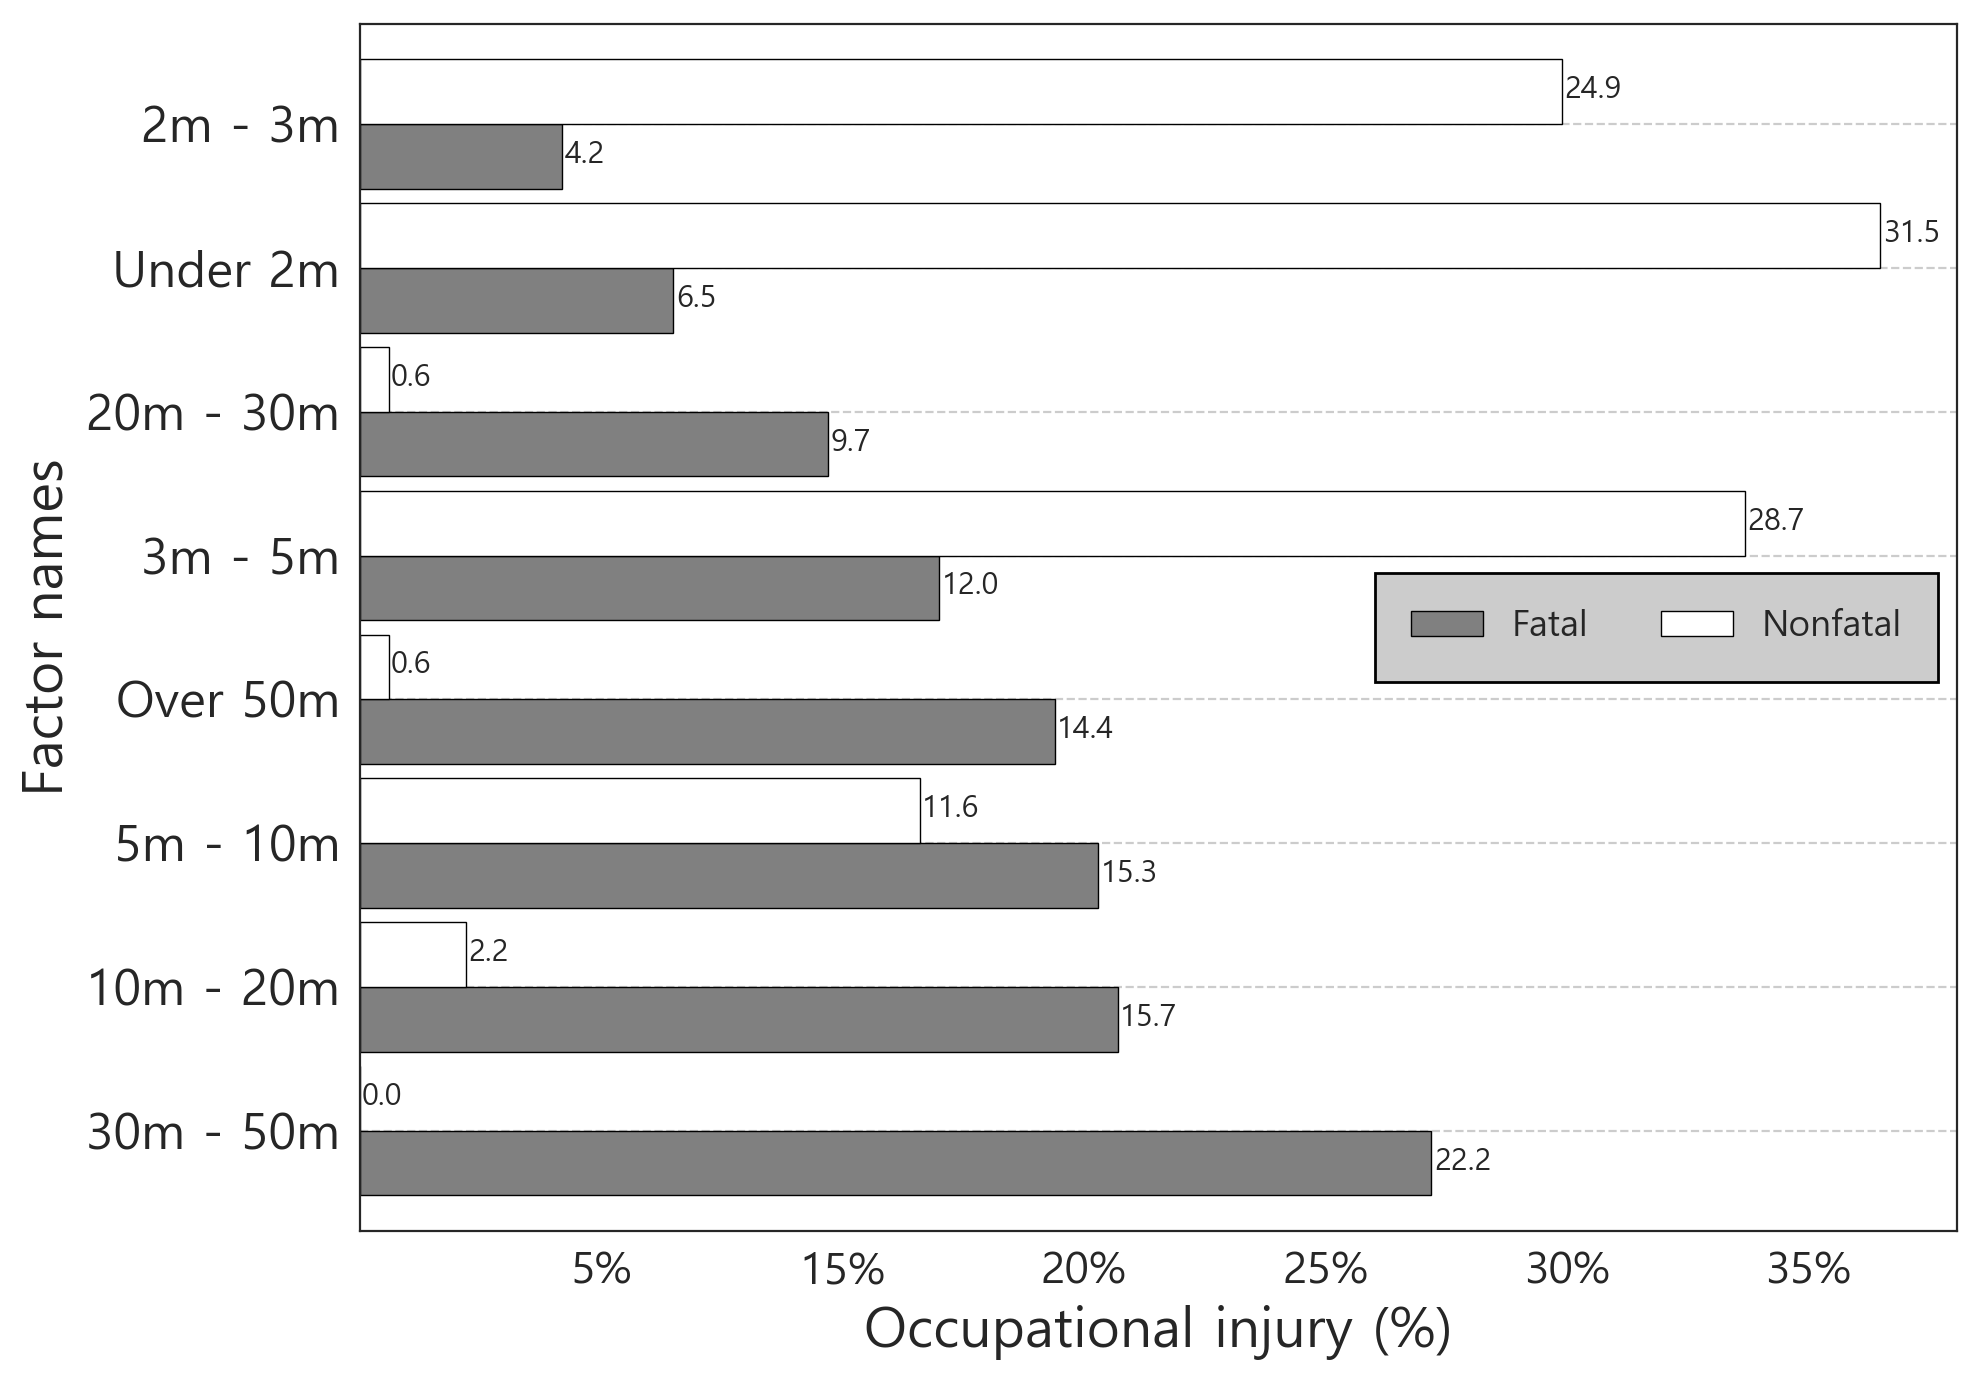

In [158]:
temp = pivot_table('추락높이', None, True, 0)
temp = temp.sort_values(by='Fatal', ascending=False)[:9]
temp

fig, ax = plt.subplots(dpi=200, figsize=(10,7))

temp.loc[:,['Fatal(%)', 'Nonfatal(%)']].plot(
    kind='barh', width=0.9, edgecolor='black', linewidth=0.5, 
    color=['gray', 'white'], ax=ax) # colormap='Pastel1'

for i in ax.patches:
    ax.text(i.get_width()+0.05, i.get_y()+0.18, str(np.round(i.get_width(), 1)), fontsize=11)

ax.legend(['Fatal', 'Nonfatal'], frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
          framealpha=1, edgecolor='black', borderpad=1, prop={'size': 13})
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
llines = leg.get_lines()  # all the lines.Line2D instance in the legend
frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')      
# plt.setp(ltext, fontsize='small')  
plt.setp(llines, linewidth=0.5)
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('Occupational injury (%)', fontsize=20)
ax.set_xticklabels(['', '5%', '15%', '20%', '25%', '30%', '35%'])
ax.set_ylabel('Factor names', fontsize=20)
ax.tick_params(axis='y', which='major', labelsize=18)
ax.tick_params(axis='x', which='major', labelsize=16)
# plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
fig.savefig('Korean-추락높이.png')

In [159]:
# temp = pivot_table('추락높이', None, True, 1)
# temp = temp.sort_values(by='Fatal', ascending=False)

# draw_plot(temp.loc[:, ['Fatal(%)', 'Nonfatal(%)']], figsize=(9,6), 
#           savefig=True, file_name='Korean-추락높이')

In [234]:
columns_eng = {
    '재해발생일': 'Date', 
    '연령': 'Age', 
    '재해유형': 'Occupational injury', 
    '규모': 'Company sizes', 
    '공정률': 'Process rates', 
    '공사금액': 'Construction cost', 
    '고용형태': 'Employment types', 
    '근로손실일수': 'Working days lost', # due to workplace injury
    '근무기간': 'Career periods',
    '인적피해': 'Number of injured',
    '개인보호장비착용': 'Personal protective equipment',
    '사고종류': '사고종류',
    '공사종류2': '공사종류2',
    '직업2': 'Occupation',
    '질병명3': 'Diagnosis names',
    '질병부위3': 'Injured body parts',
    '재해발생장소1': '재해발생장소',
    '작업공정_원인3': 'Work processes',
    '작업내용_원인4': 'Work contents',
    '기인물3': 'Original-cause materials',
    '발생형태3': 'Occupational accident types',
    '가해물1': 'Assailing materials',
    '불안전상태1': 'Unsafe states',
    '불안전행동1': 'Unsafe behaviors',
    '추락높이': 'Fall heights',
    '추락장소1': 'Fall places' 
}

df.rename(columns=columns_eng, inplace=True)
print(len(df.columns))
df.columns

20


Index(['Date', 'Occupational injury', 'Company sizes', 'Construction cost',
       'Employment types', '재해발생장소', 'Career periods',
       'Personal protective equipment', 'Occupation', 'Diagnosis names',
       'Injured body parts', 'Work processes', 'Work contents',
       'Original-cause materials', 'Occupational accident types',
       'Assailing materials', 'Unsafe states', 'Unsafe behaviors',
       'Fall heights', 'Fall places'],
      dtype='object')

In [235]:
for col in df.columns:
    if col != 'Date':
        print(col, df[col].nunique(), df[col].value_counts().index.tolist()[:5])

Occupational injury 2 ['Nonfatal', 'Fatal']
Company sizes 11 ['< 5', '100 - 199', '300 - 499', '5 - 9', '50 - 99']
Construction cost 18 ['Over 100,000,000', '50,000,000 - 100,000,000', '30,000,000 - 50,000,000', '2,000,000 - 5,000,000', '1,000,000 - 2,000,000']
Employment types 4 ['Daily', 'Full-time', 'Temporary', 'Part-time']
재해발생장소 1 ['Apartment']
Career periods 14 ['Under 1 month', 'Over 20 years', '10 - 20 years', '5 - 10 years', '1 - 2 months']
Personal protective equipment 9 ['Not wearing', 'Safety harness', 'Safety helmet', 'Safety shoes', 'Safety gloves']
Occupation 59 ['Architectural woodworker', 'Construction and mining worker', 'Architect painter', 'Other construction worker', 'Steel worker']
Diagnosis names 11 ['Injury of bone, nerve, spinal cord', 'Intracranial injury traumatic', 'Damage of muscles, tendons, ligaments, joints, etc.', 'Multiple damage or addiction', 'Open wound']
Injured body parts 7 ['Head', 'Soma(body)', 'Lower limb', 'Upper limb', 'Whole body']
Work pro

In [236]:
from scipy.stats import chi2_contingency

test_of_independence = pd.DataFrame()
for col in df.columns:
    if col not in ['Date', 'Occupational injury', '재해발생장소', 'Occupational accident types']:
        temp = df.pivot_table(index=col, columns=['Occupational injury'], values='Date', fill_value=0, aggfunc='count')
        chi2, p, dof, ex = chi2_contingency(temp.values)
        test_of_independence.loc[col, 'Count'] = temp.sum().sum()
        test_of_independence.loc[col, 'Missing values'] = df[col].isnull().sum()
        test_of_independence.loc[col, 'No. of categories'] = temp.index.nunique()
        test_of_independence.loc[col, 'chi2'] = chi2 
        test_of_independence.loc[col, 'p-value'] = p
        test_of_independence.loc[col, 'df'] = dof 

test_of_independence.sort_values(by='p-value')

,Count,Missing values,No. of categories,chi2,p-value,df
Diagnosis names,938.0,0.0,11.0,621.078742,5.349735e-127,10.0
Injured body parts,938.0,0.0,7.0,417.552777,4.699586e-87,6.0
Unsafe behaviors,938.0,0.0,65.0,348.380323,9.802789e-41,64.0
Personal protective equipment,938.0,0.0,9.0,187.344069,2.947221e-36,8.0
Fall heights,397.0,541.0,8.0,177.661832,6.071738e-35,7.0
Unsafe states,938.0,0.0,63.0,308.782086,1.891616e-34,62.0
Fall places,938.0,0.0,26.0,208.767381,6.236187e-31,25.0
Original-cause materials,938.0,0.0,31.0,216.309832,4.213958e-30,30.0
Assailing materials,938.0,0.0,138.0,302.622090,1.595479e-14,137.0
Work contents,938.0,0.0,42.0,149.820583,2.605327e-14,41.0


In [163]:
test_of_independence.to_excel('output.xlsx')

## Correspondence Analysis 

In [237]:
from tools import CorrespondenceAnalysis
from adjustText import adjust_text
import seaborn as sns

In [238]:
df['Occupational accident types'].value_counts()

Fall from height    411
Rollover            153
Falling objects     125
Collision           114
Stucked              60
Others               36
Collapse             20
Electrical           19
Name: Occupational accident types, dtype: int64

In [239]:
df1 = df[df['Occupational accident types'] == 'Fall from height'].copy()
df2 = df[df['Occupational accident types'] == 'Rollover'].copy()
df3 = df[df['Occupational accident types'] == 'Falling objects'].copy()
df4 = df[df['Occupational accident types'] == 'Collision'].copy()

In [246]:
def mca(df, columns, limit, filename):
    temp = df[columns].copy()    
        
    _cols = {}
    for i, col in enumerate(temp.columns):
        _cols[col] = 'C{}'.format(i+1)
    temp.rename(columns=_cols, inplace=True)

    categories_ = {}
    for col in temp.columns:
        _temp = {}
        for i, value in enumerate(temp[col].value_counts().index.tolist()):
            _temp[value] = 'F{}'.format(i+1)
        temp[col].replace(_temp, inplace=True)
        categories_[col] = _temp

    for col in temp.columns:
        if col not in ['C1']:
            contains = temp[col].value_counts()[
                (temp[col].value_counts() / temp[col].value_counts().sum()).cumsum() < limit
            ].index.tolist()
            if len(contains) > 0:
                temp = temp[temp[col].isin(contains)]
    
    
    i = 0
    indexing = []
    for n, col in enumerate(temp.columns):
        j = temp[col].nunique()
#         print('No. {}  {}:{}'.format(n, i, i + j))
        indexing.append((i, i + j))
        i = i + j

    NUM_COLORS = 7

    cm = plt.get_cmap('gist_gray')
    for i in range(NUM_COLORS):
        color = cm(1.*i / NUM_COLORS)  # color will now be an RGBA tuple

    # or if you really want a generator:
    colors = (cm(1.*i / NUM_COLORS) for i in range(NUM_COLORS))

    # temp = falls[['재해유형', '추락장소1', '기인물3']]
    temp = pd.get_dummies(temp, prefix_sep='-')

    #font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    #rc('font', family=font_name)

    ca = CorrespondenceAnalysis(2)
    ca.fit(temp)
    pcs_row, pcs_col = ca.get_princpl_coords_df(row_categories=temp.index,
                                                col_categories=temp.columns)

    fig, ax = plt.subplots(figsize=(7,5), dpi=200)

    colors = ['blue', 'red', 'yellow', 'black', 'green', 'grey', 'skyblue']
    markers = ['o', '+', '.', '+', '^', '<', ','] # 'v', '>', '8', 's', 'p', 'H', 'D'

    for i, m, c in zip(indexing, markers, colors):
        sns.regplot('Dim 0', 'Dim 1', data=pcs_col.iloc[i[0]:i[1]], fit_reg=False, ax=ax, marker=m, scatter_kws={'color': c})

    texts = [plt.text(pcs_col.iloc[i, 0], 
                      pcs_col.iloc[i, 1], 
                      pcs_col.index.tolist()[i]) for i in range(len(pcs_col))]

    adjust_text(texts, expand_text=(1.03, 1.2),
                arrowprops=dict(arrowstyle='-', connectionstyle='arc3', color='grey', linewidth=0.6))

    ax.set_xlabel('Dimension 1', fontsize=15)
    ax.set_ylabel('Dimension 2', fontsize=15)
    ax.axvline(x=0, linewidth=0.5)
    ax.axhline(y=0, linewidth=0.5)
    plt.rc('font', size=12)
    # ax.set_title(title)
    ax.grid(axis='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', bottom=False, left=False, labelleft=False, labelbottom=False)
    fig.tight_layout()
    plt.show()
    fig.savefig(filename)
    return categories_, pcs_col

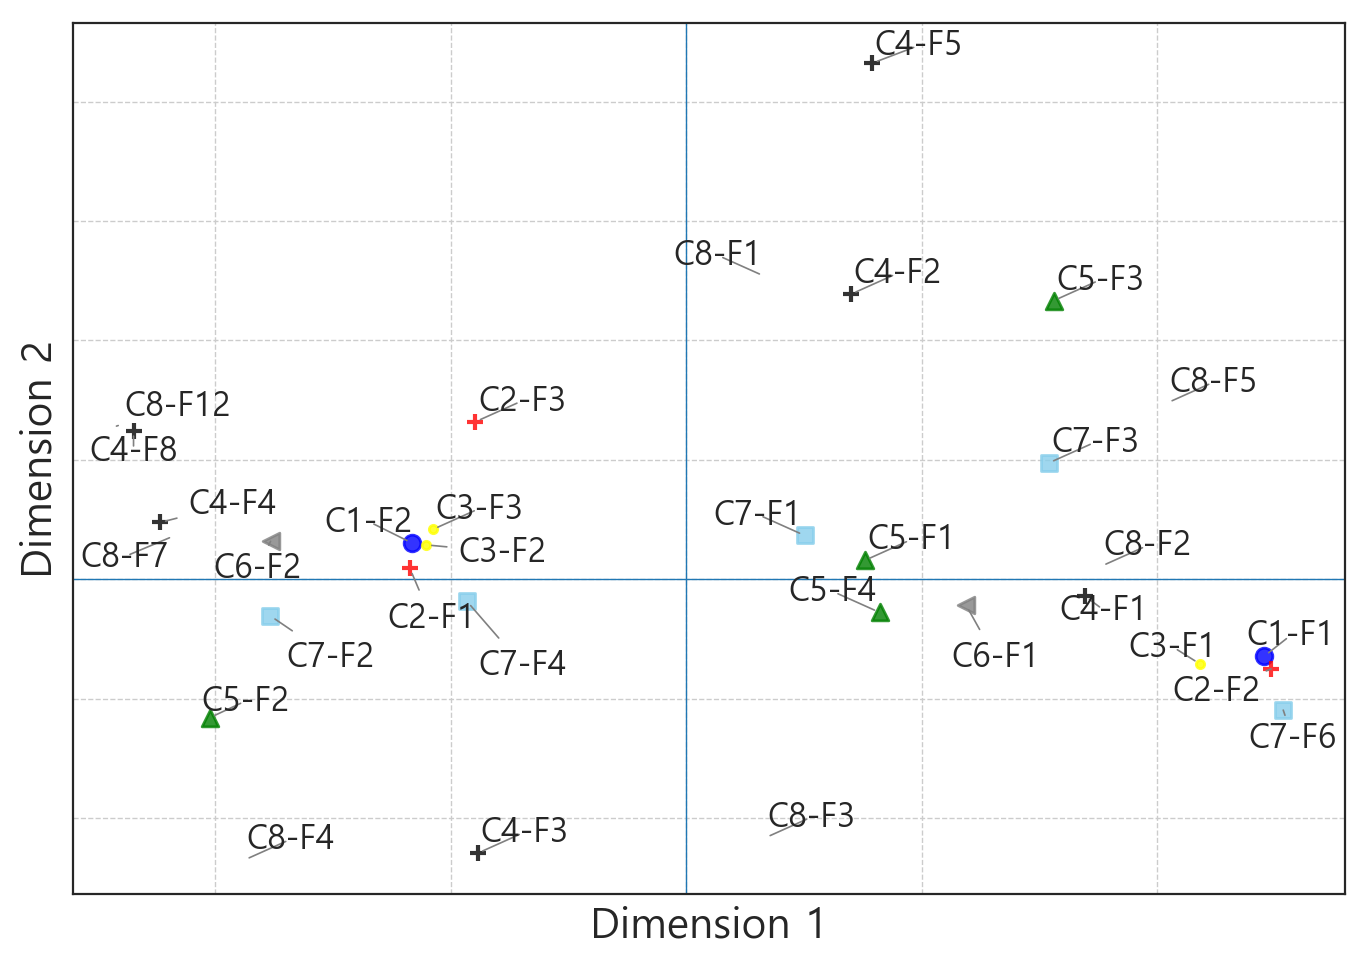

In [247]:
cols = [
    'Occupational injury', 'Diagnosis names', 'Injured body parts', 
    'Unsafe behaviors', 'Original-cause materials', 
    'Personal protective equipment', 'Fall heights', 
    'Unsafe states',
] # '근로손실일수'

fall_categories, fall_result = mca(df1, cols, 0.85, 'Korean-추락')

In [248]:
fall_categories

{'C1': {'Fatal': 'F1', 'Nonfatal': 'F2'},
 'C2': {'Injury of bone, nerve, spinal cord': 'F1',
  'Intracranial injury traumatic': 'F2',
  'Multiple damage or addiction': 'F3',
  'Other traumatic injuries or addiction': 'F4',
  'Damage of muscles, tendons, ligaments, joints, etc.': 'F5',
  'Open wound': 'F6',
  'Superficial wound or bruise': 'F7',
  'Symptom': 'F8',
  'Influence of environmental conditions': 'F9'},
 'C3': {'Head': 'F1',
  'Soma(body)': 'F2',
  'Lower limb': 'F3',
  'Multiple body parts': 'F4',
  'Whole body': 'F5',
  'Upper limb': 'F6',
  'Neck': 'F7'},
 'C4': {'Not wearing or poor wearing protective equipment': 'F1',
  'Not installed protect facilities': 'F2',
  'Omitted or defective work platform or ladder': 'F3',
  'Missing footing on the stairs or structure': 'F4',
  'Improper procedure of assembly and disassembly': 'F5',
  'Use of defective equipment, machinery': 'F6',
  'Abandonment of defective structures': 'F7',
  'Other mistakes during work': 'F8',
  'other impr

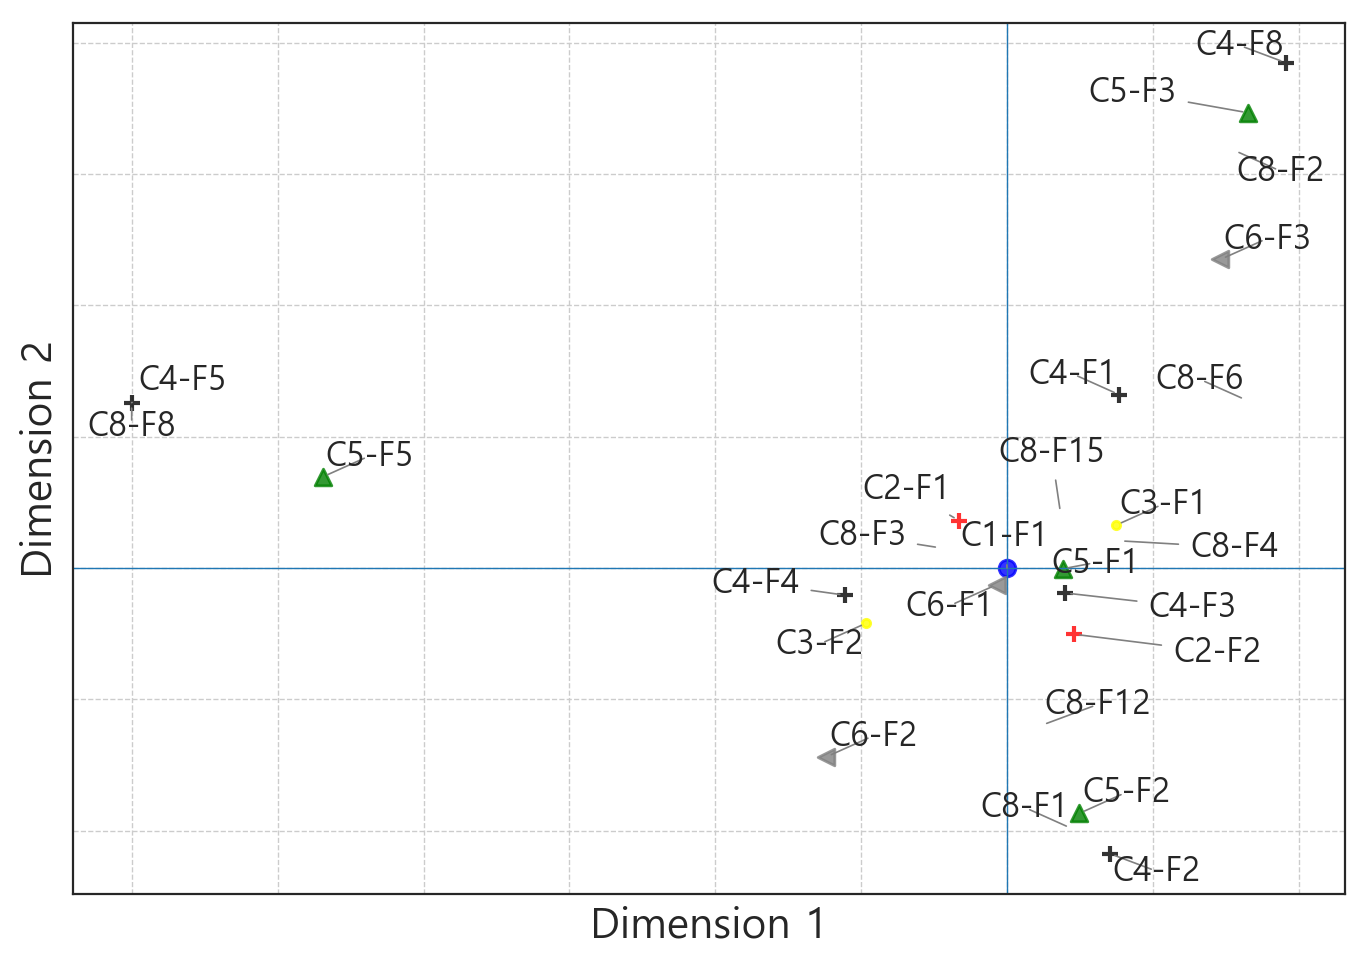

In [249]:
rollover_categories, rollover_result = mca(df2, cols, 0.85, 'Korean-전복')

In [252]:
rollover_categories

{'C1': {'Nonfatal': 'F1', 'Fatal': 'F2'},
 'C2': {'Injury of bone, nerve, spinal cord': 'F1',
  'Damage of muscles, tendons, ligaments, joints, etc.': 'F2',
  'Intracranial injury traumatic': 'F3',
  'Open wound': 'F4',
  'Multiple damage or addiction': 'F5',
  'Superficial wound or bruise': 'F6',
  'Other traumatic injuries or addiction': 'F7'},
 'C3': {'Lower limb': 'F1',
  'Soma(body)': 'F2',
  'Upper limb': 'F3',
  'Head': 'F4',
  'Neck': 'F5',
  'Multiple body parts': 'F6'},
 'C4': {'Unsafe factor left alone in the work passage or floor': 'F1',
  'Missing footing on the stairs or structure': 'F2',
  'Other mistakes during work': 'F3',
  'Inadequate out-of-court passage, floor etc.': 'F4',
  'Omitted or defective work platform or ladder': 'F5',
  'Inadequate loading status left': 'F6',
  'Improper procedure of assembly and disassembly': 'F7',
  'Mistake of handling objects': 'F8',
  'Not wearing or poor wearing protective equipment': 'F9',
  '상세정보 부족한 그 밖의  과실': 'F10',
  'Not insta

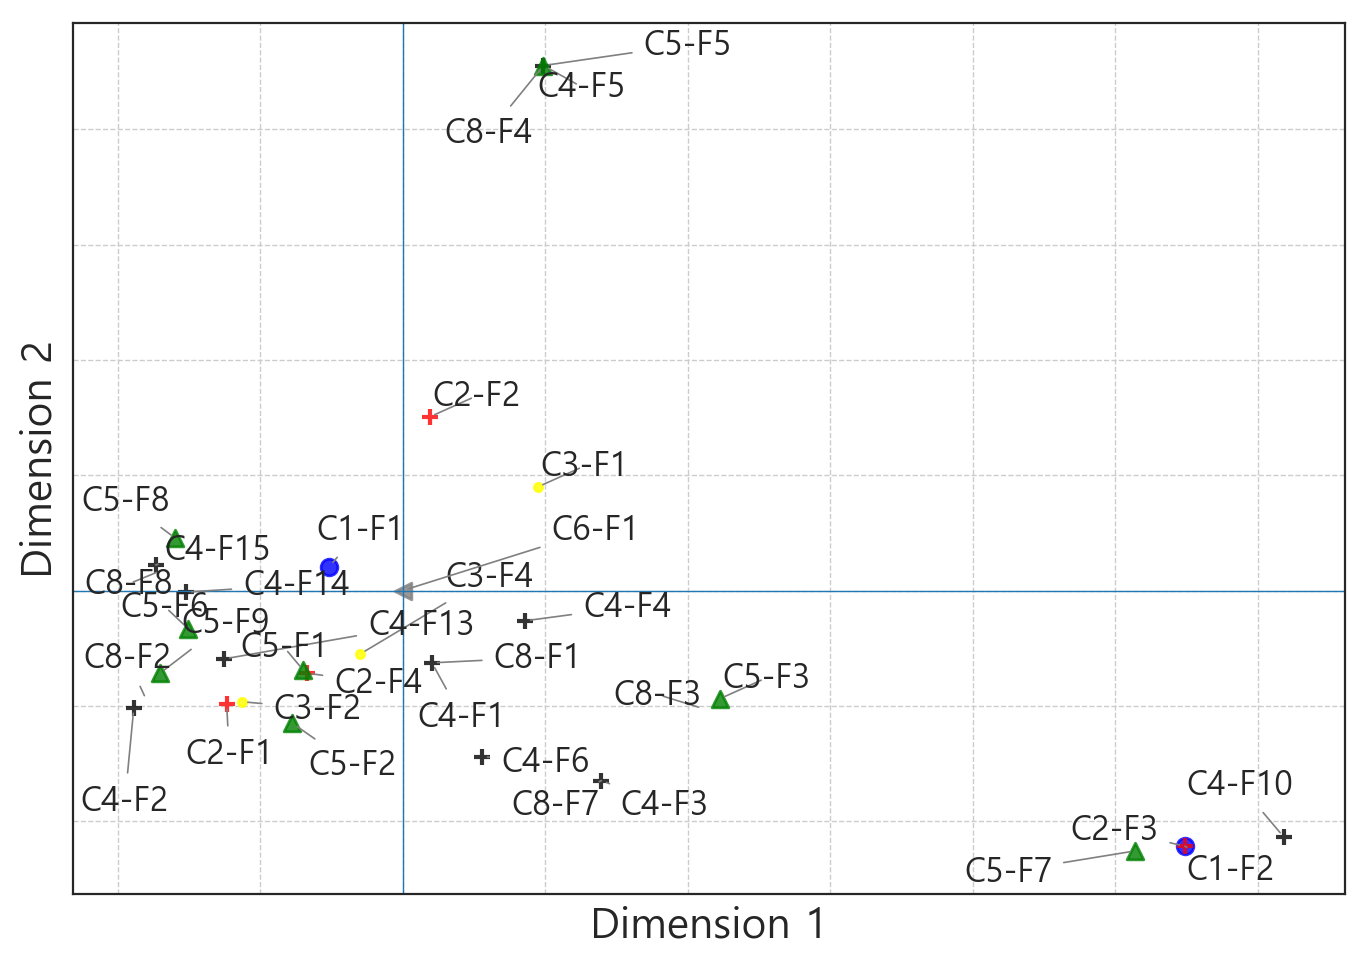

In [250]:
falling_categories, falling_result = mca(df3, cols, 0.85, 'Korean-낙하물')

In [251]:
falling_categories

{'C1': {'Nonfatal': 'F1', 'Fatal': 'F2'},
 'C2': {'Injury of bone, nerve, spinal cord': 'F1',
  'Open wound': 'F2',
  'Intracranial injury traumatic': 'F3',
  'Multiple damage or addiction': 'F4',
  'Other traumatic injuries or addiction': 'F5',
  'Damage of muscles, tendons, ligaments, joints, etc.': 'F6',
  'Superficial wound or bruise': 'F7',
  'Diseases and disorder of musculoskeletal or connective tissue': 'F8'},
 'C3': {'Head': 'F1',
  'Lower limb': 'F2',
  'Soma(body)': 'F3',
  'Upper limb': 'F4',
  'Neck': 'F5',
  'Multiple body parts': 'F6',
  'Whole body': 'F7'},
 'C4': {'Improper procedure of assembly and disassembly': 'F1',
  'Mistake of handling objects': 'F2',
  'Inadequate loading status left': 'F3',
  'Abandonment of defective structures': 'F4',
  'Mistake handling hand tools': 'F5',
  'Improper transporting process': 'F6',
  'Inadequate management and supervision': 'F7',
  'Not installed protect facilities': 'F8',
  'Improper usage of facilities or machines': 'F9',
  '

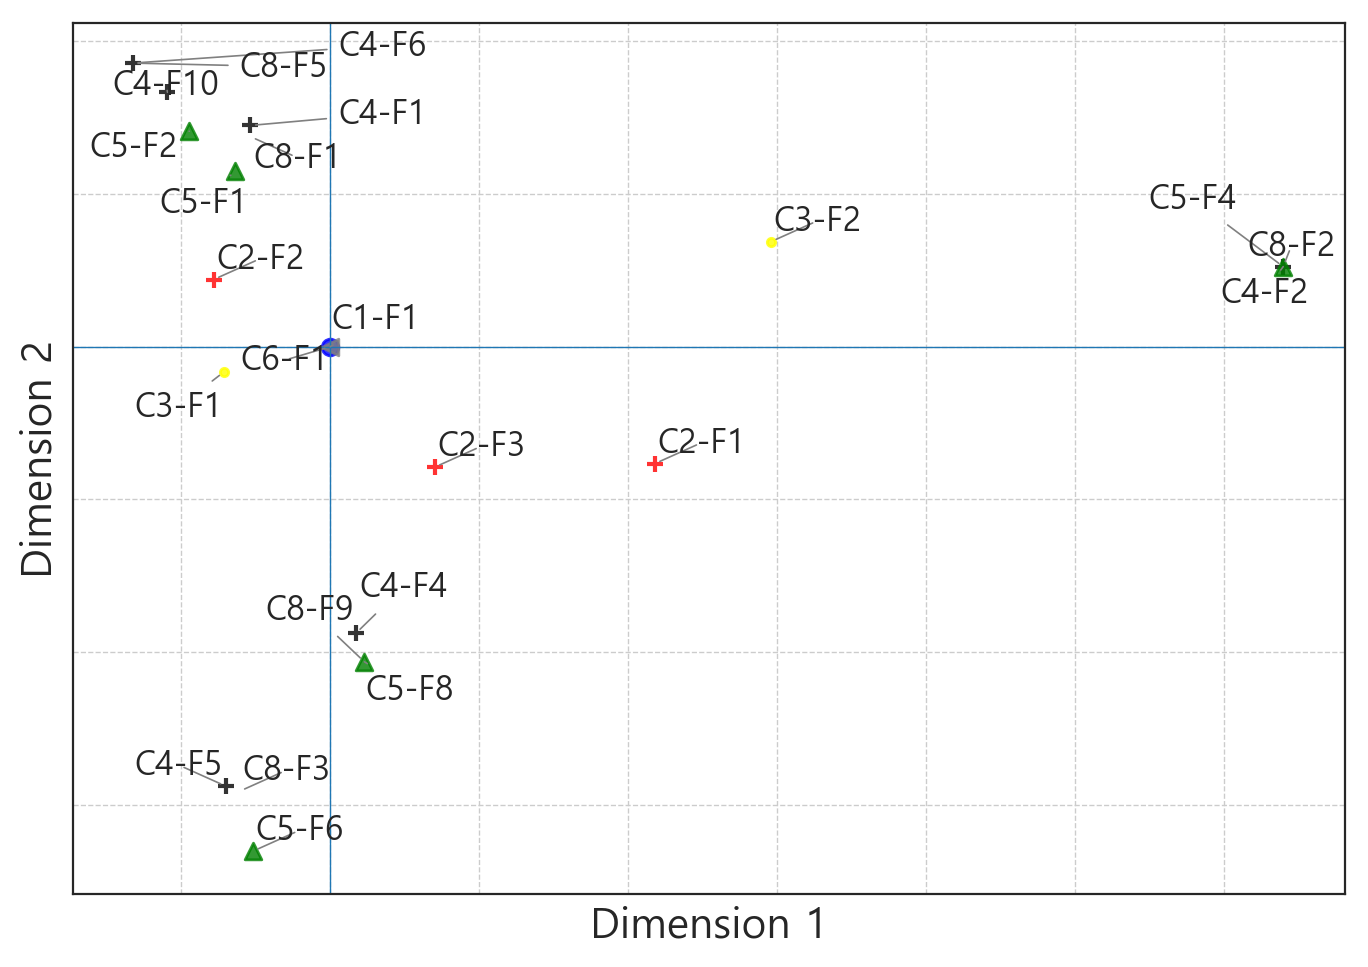

In [253]:
collision_categories, collision_result = mca(df4, cols, 0.85, 'Korean-충돌')

In [254]:
collision_categories

{'C1': {'Nonfatal': 'F1', 'Fatal': 'F2'},
 'C2': {'Injury of bone, nerve, spinal cord': 'F1',
  'Open wound': 'F2',
  'Damage of muscles, tendons, ligaments, joints, etc.': 'F3',
  'Other traumatic injuries or addiction': 'F4',
  'Multiple damage or addiction': 'F5',
  'Superficial wound or bruise': 'F6',
  'Intracranial injury traumatic': 'F7',
  'Symptom': 'F8'},
 'C3': {'Upper limb': 'F1',
  'Lower limb': 'F2',
  'Soma(body)': 'F3',
  'Head': 'F4',
  'Multiple body parts': 'F5',
  'Whole body': 'F6',
  'Neck': 'F7'},
 'C4': {'Misoperation of facility or machines': 'F1',
  'Improper communication or signal': 'F2',
  'Unsafe factor left alone in the work passage or floor': 'F3',
  'Other mistakes during work': 'F4',
  'Mistake handling hand tools': 'F5',
  'No protection facilities such as cover': 'F6',
  'Vehicle misoperation': 'F7',
  'Mistake of handling objects': 'F8',
  'Inadequate loading status left': 'F9',
  'Safety and protection device left unattached state': 'F10',
  'Impro

In [ ]:
from scipy.stats import chi2_contingency

def pivot_table(index=None, lambda_=None, subset=False, ratio=0):
    temp = df.pivot_table(index=index, columns=['재해유형'], values='재해발생일', fill_value=0, aggfunc='count')
    chi2, p, dof, ex = chi2_contingency(temp.values, lambda_=lambda_)
    print('Test of independence')
    print('Null hypothesis: Assumes that there is no association between the two variables.')
    print('Alternative hypothesis: Assumes that there is an association between the two variables.\n')
    print('Chi-squared statistic: {} \np-value: {:.3f} \nDegrees of freedom: {}\n'.format(chi2, float(str(p)), dof))
    temp['Fatal(%)'] = np.round(temp['Fatal'] / temp['Fatal'].sum(), 3) * 100
    temp['Nonfatal(%)'] = np.round(temp['Nonfatal'] / temp['Nonfatal'].sum(), 3) * 100
    temp['Total'] = temp['Fatal'] + temp['Nonfatal']
    temp['Ratio(%)'] = np.round(temp['Total'] / temp['Total'].sum(),3) * 100
    temp.sort_values(by='Total', ascending=False, inplace=True)
    if subset:
        return temp[temp['Ratio(%)'] > ratio]
    return temp

In [ ]:
temp = pivot_table('질병명3')

fig, ax = plt.subplots(dpi=200, figsize=(10,6))
temp.sort_values(by=['Fatal']).loc[:,['Fatal(%)', 'Nonfatal(%)']].plot(
    kind='barh', width=0.9, edgecolor='black', 
    linewidth=0.5, color=['gray', 'white'], ax=ax) # colormap='Pastel1'

for i in ax.patches:
    ax.text(i.get_width()+0.3, i.get_y()+0.1, str(np.round(i.get_width(), 1)), fontsize=11)

ax.legend(['Fatal', 'Nonfatal'], frameon=True, loc='lower right', shadow=False, fancybox=False, ncol=2,
          framealpha=1, edgecolor='black', borderpad=1)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
llines = leg.get_lines()  # all the lines.Line2D instance in the legend
frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')      
# plt.setp(ltext, fontsize='small')  
plt.setp(llines, linewidth=0.5)
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('Number of occupational injury (%)', fontsize=13)
ax.set_xlim([0, 55])
ax.set_xticklabels(['', '10%', '20%', '30%', '40%', '50%', '60%'])
ax.set_ylabel('Factor names', fontsize=13)
# plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
fig.savefig('Korean-diagnosis.png')

In [ ]:
temp = pivot_table('질병부위3')
temp = temp.sort_values(by='Fatal', ascending=False)

draw_plot(temp.loc[:,['Fatal(%)', 'Nonfatal(%)']], center=.1, savefig=True, file_name='Korean-질병부위')

In [ ]:
temp = pivot_table('개인보호장비착용', None, True, 1)
temp = temp.sort_values(by='Fatal', ascending=False)

draw_plot(temp.loc[:, ['Fatal(%)', 'Nonfatal(%)']], savefig=True, file_name='개인보호장비착용')

In [ ]:
temp = pivot_table('불안전상태1', None, True, 5)
temp = temp.sort_values(by='Fatal', ascending=False)

fig, ax = plt.subplots(dpi=200, figsize=(10,6))
temp.sort_values(by='Fatal').loc[:, ['Fatal(%)', 'Nonfatal(%)']].plot(
    kind='barh', width=0.9, edgecolor='black', 
    linewidth=0.5, color=['gray', 'white'], ax=ax) # colormap='Pastel1'

for i in ax.patches:
    ax.text(i.get_width()+0.05, i.get_y()+0.1, str(np.round(i.get_width(), 1)), fontsize=11)

ax.legend(frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
          framealpha=1, edgecolor='black', borderpad=1)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
llines = leg.get_lines()  # all the lines.Line2D instance in the legend
frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')      
# plt.setp(ltext, fontsize='small')  
plt.setp(llines, linewidth=0.5)
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('Number of accident types (%)', fontsize=13)
ax.set_ylabel('Occupation', fontsize=13)
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
fig.savefig('불안전상태.png')

In [ ]:
temp = pivot_table('추락장소1', None, True, 1)

fig, ax = plt.subplots(dpi=200, figsize=(10,6))
temp.sort_values(by='Fatal').loc[:,['Fatal(%)', 'Nonfatal(%)']].plot(
    kind='barh', width=0.9, edgecolor='black', 
    linewidth=0.5, color=['gray', 'white'], ax=ax) # colormap='Pastel1'

for i in ax.patches:
    ax.text(i.get_width()+0.05, i.get_y()+0.1, str(np.round(i.get_width(), 1)), fontsize=11)

ax.legend(frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
          framealpha=1, edgecolor='black', borderpad=1)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
llines = leg.get_lines()  # all the lines.Line2D instance in the legend
frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')      
# plt.setp(ltext, fontsize='small')  
plt.setp(llines, linewidth=0.5)
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('Number of occupational injury (%)', fontsize=13)
ax.set_ylabel('Factor names', fontsize=13)
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
fig.savefig('추락장소.png')

In [ ]:
temp = pivot_table('기인물3', None, True, 3)

# draw_plot(temp.loc[:, ['사고사망(%)', '사고이환(%)']], savefig=True, file_name='기인물')
fig, ax = plt.subplots(dpi=200, figsize=(10,6))
temp.sort_values(by='Fatal').loc[:,['Fatal(%)', 'Nonfatal(%)']].plot(
    kind='barh', width=0.9, edgecolor='black', 
    linewidth=0.5, color=['gray', 'white'], ax=ax) # colormap='Pastel1'

for i in ax.patches:
    ax.text(i.get_width()+0.05, i.get_y()+0.1, str(np.round(i.get_width(), 1)), fontsize=11)

ax.legend(frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
          framealpha=1, edgecolor='black', borderpad=1)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
llines = leg.get_lines()  # all the lines.Line2D instance in the legend
frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')      
# plt.setp(ltext, fontsize='small')  
plt.setp(llines, linewidth=0.5)
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('Number of occupational injury (%)', fontsize=13)
ax.set_ylabel('Factor names', fontsize=13)
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
fig.savefig('기인물.png')

In [ ]:
temp = pivot_table('가해물1', None, True, 1)
# print(temp)

# draw_plot(temp.loc[:, ['Fatal(%)', 'Nonfatal(%)']], savefig=True, file_name='가해물')
fig, ax = plt.subplots(dpi=200, figsize=(10,6))
temp.sort_values(by='Fatal').loc[:,['Fatal(%)', 'Nonfatal(%)']].plot(
    kind='barh', width=0.9, edgecolor='black', 
    linewidth=0.5, color=['gray', 'white'], ax=ax) # colormap='Pastel1'

for i in ax.patches:
    ax.text(i.get_width()+0.05, i.get_y()+0.1, str(np.round(i.get_width(), 1)), fontsize=11)

ax.legend(frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
          framealpha=1, edgecolor='black', borderpad=1)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
llines = leg.get_lines()  # all the lines.Line2D instance in the legend
frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')      
# plt.setp(ltext, fontsize='small')  
plt.setp(llines, linewidth=0.5)
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('Number of occupational injury (%)', fontsize=13)
ax.set_ylabel('Factor names', fontsize=13)
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
fig.savefig('가해물.png')

In [ ]:
temp = df.pivot_table(index=['개인보호장비착용', '추락높이'], columns='재해유형', values='재해발생일', aggfunc='count', fill_value=0)
temp = temp.loc[['안전대', '안전모', '미착용']]
temp['합계'] = temp.sum(axis=1)
temp

In [ ]:
temp['합계비율'] = temp.groupby(level=0).apply(lambda x: np.round(x * 100, 1) / x.sum())['합계']

In [ ]:
sequence = ['2미터 미만', '2미터 이상 - 3미터 미만', '3미터 이상 - 5미터 미만', '5미터 이상 - 10미터 미만', 
            '10미터 이상 - 20미터 미만', '20미터 이상 - 30미터 미만', '30미터 이상 - 50미터 미만', '50미터 이상'][::-1]

fig, axes = plt.subplots(1, 3, figsize=(10,5), sharey=True, dpi=200)
temp.loc['안전대', ['사고사망', '사고이환']].reindex(sequence).plot(kind='barh', ax=axes[0], width=0.7, edgecolor='black', linewidth=0.5, color=['gray', 'white'])
temp.loc['안전모', ['사고사망', '사고이환']].reindex(sequence).plot(kind='barh', ax=axes[1], width=0.7, edgecolor='black', linewidth=0.5, color=['gray', 'white'])
temp.loc['미착용', ['사고사망', '사고이환']].reindex(sequence).plot(kind='barh', ax=axes[2], width=0.7, edgecolor='black', linewidth=0.5, color=['gray', 'white'])

axes[0].set_title('안전대')
axes[1].set_title('안전모')
axes[2].set_title('미착용')

axes[0].legend().set_visible(False)
axes[1].legend().set_visible(False)
axes[2].legend(frameon=True, loc='lower right', shadow=False, fancybox=False, framealpha=1, edgecolor='black', borderpad=1)
leg = plt.gca().get_legend()
frame = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')   

fig.tight_layout()
fig.subplots_adjust(wspace=0.02)
plt.show()
fig.savefig('subequipment.png')

In [ ]:
temp = pivot_table('공사금액', None, True, 3)
temp

In [ ]:
fig, ax = plt.subplots(dpi=200, figsize=(10,6))
temp.sort_values(by='Fatal').loc[:,['Fatal(%)', 'Nonfatal(%)']].plot(kind='barh', width=0.9, edgecolor='black', linewidth=0.5, color=['gray', 'white'], ax=ax) # colormap='Pastel1'

for i in ax.patches:
    ax.text(i.get_width()+0.05, i.get_y()+0.1, str(np.round(i.get_width(), 1)), fontsize=11)

ax.legend(frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
          framealpha=1, edgecolor='black', borderpad=1)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
llines = leg.get_lines()  # all the lines.Line2D instance in the legend
frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')      
# plt.setp(ltext, fontsize='small')  
plt.setp(llines, linewidth=0.5)
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('Number of occupational injury (%)', fontsize=13)
ax.set_ylabel('Factor names', fontsize=13)
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
fig.savefig('career.png')

In [ ]:
temp = pivot_table('근무기간')
temp = temp[:10]

In [ ]:
draw_plot(temp.loc[:, ['Fatal(%)', 'Nonfatal(%)']], center=0.08, height=.1, savefig=True, file_name='career')

In [ ]:
temp = pivot_table('직업2', None, True, 2)
temp

In [ ]:
temp = pivot_table('기인물3', None, True, 1)
temp

In [ ]:
fig, ax = plt.subplots(dpi=200, figsize=(10,6))
temp.sort_values(by='Fatal').loc[:, ['Fatal(%)', 'Nonfatal(%)']].plot(
    kind='barh', width=0.9, edgecolor='black', linewidth=0.5, 
    color=['gray', 'white'], ax=ax) # colormap='Pastel1'

for i in ax.patches:
    ax.text(i.get_width()+0.1, i.get_y()+0.15, str(np.round(i.get_width(), 1)), fontsize=11)

ax.legend(['Fatal', 'Nonfatal'], frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
          framealpha=1, edgecolor='black', borderpad=1)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
llines = leg.get_lines()  # all the lines.Line2D instance in the legend
frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')      
# plt.setp(ltext, fontsize='small')  
plt.setp(llines, linewidth=0.5)
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('Number of occupational injury (%)', fontsize=13)
ax.set_ylabel('Factor names', fontsize=13)
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
fig.savefig('기인물.png')

In [ ]:
temp = pivot_table('규모')
temp

In [ ]:
fig, ax = plt.subplots(dpi=200, figsize=(10,6))
temp.sort_values(by='Fatal').loc[:, ['Fatal(%)', 'Nonfatal(%)']].plot(
    kind='barh', width=0.9, edgecolor='black', linewidth=0.5,
    color=['gray', 'white'], ax=ax) # colormap='Pastel1'

for i in ax.patches:
    ax.text(i.get_width()+0.1, i.get_y()+0.15, str(np.round(i.get_width(), 1)), fontsize=11)

ax.legend(['Fatal', 'Nonfatal'], frameon=True, loc='best', shadow=False, fancybox=False, ncol=2,
          framealpha=1, edgecolor='black', borderpad=1)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()  # all the text.Text instance in the legend
llines = leg.get_lines()  # all the lines.Line2D instance in the legend
frame  = leg.get_frame()  # the patch.Rectangle instance surrounding the legend
frame.set_facecolor('0.80')      
# plt.setp(ltext, fontsize='small')  
plt.setp(llines, linewidth=0.5)
ax.grid(linestyle='--', axis='y')
ax.set_xlabel('Number of occupational injury (%)', fontsize=13)
ax.set_ylabel('Factor names', fontsize=13)
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()
fig.savefig('size.png')

In [ ]:
pivot_table('작업공정_원인3', None, True, 1)

In [ ]:
pivot_table('작업내용_원인4', None, True, 3)

In [ ]:

temp

In [ ]:
test_of_independence = pd.DataFrame()
for col in df.columns:
    if col not in ['재해발생일', '재해유형', '발생형태3']:
        temp = df.pivot_table(index=col, columns=['재해유형'], values='재해발생일', fill_value=0, aggfunc='count')
        chi2, p, dof, ex = chi2_contingency(temp.values)
        test_of_independence.loc[col, 'count'] = temp.sum().sum()
        test_of_independence.loc[col, 'missing'] = df[col].isnull().sum()
        test_of_independence.loc[col, 'category'] = temp.index.nunique()
        test_of_independence.loc[col, 'chi2'] = chi2 
        test_of_independence.loc[col, 'p-value'] = p
        test_of_independence.loc[col, 'df'] = dof 

test_of_independence.sort_values(by='p-value')

In [ ]:
with pd.ExcelWriter('output.xlsx') as writer:
    test_of_independence.to_excel(writer, sheet_name='독립성검정')

In [ ]:
for col in df.columns:
    if col != '재해발생일':
        print(col, df[col].nunique(), df[col].value_counts().index.tolist()[:5])